<a href="https://colab.research.google.com/github/franmazzaro/7506R-2C2023-GRUPO39/blob/main/7506R_TP1_GRUPO39_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

# Exploración Inicial

Comenzamos obteniendo una visualización general del Dataframe y sus tipos de datos

In [2]:
reservas = pd.read_csv('/content/sample_data/hotels_train.csv')
reservas.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


In [3]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [4]:
reservas.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [5]:
reservas.shape

(61913, 31)

## Análisis de variables

### Variables cualitativas

**VARIABLE HOTEL**

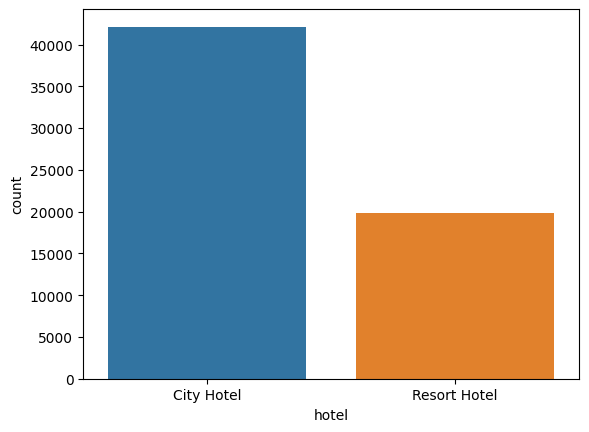

In [6]:
sns.countplot(x='hotel', data=reservas,)
plt.show()

In [7]:
reservas["hotel"].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Vemos que hay mas de el doble de reservas del City Hotel que del Resort Hotel.

**VARIABLE ARRIVAL_DATE_MONTH**

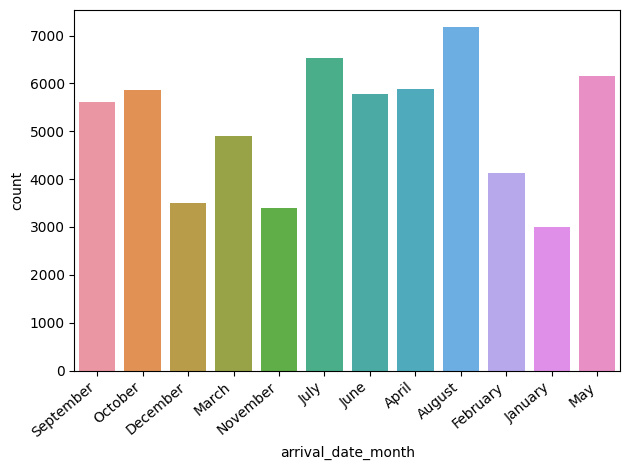

In [8]:
arrival_date_month_grafic = sns.countplot(x='arrival_date_month', data=reservas, )
arrival_date_month_grafic.set_xticklabels(arrival_date_month_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

La mayor cantidad de arrivos se dan en agosto.

**VARIABLE MEAL**

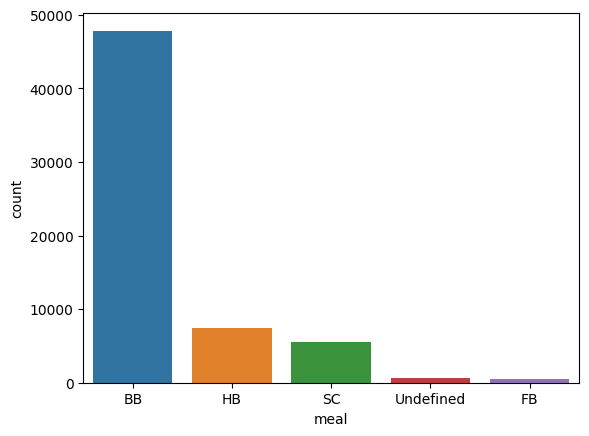

In [9]:
sns.countplot(x='meal', data=reservas, )
plt.show()

Como vemos el mayor tipo de comida en los hoteles es BB, luego le siguen HB y SC, y en ultimo lugar FB que tiene el mismo volumen que las comidas que no fueron registradas

**VARIABLE COUNTRY**

In [10]:
reservas["country"].unique()

array(['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU',
       'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL',
       'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF',
       'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS',
       'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU',
       'ARE', nan, 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN',
       'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB',
       'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL',
       'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG',
       'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY',
       'SUR', 'KWT', 'BGD', 'IRQ', 'MDV', 'GGY', 'VGB', 'ECU', 'URY',
       'ETH', 'LBN', 'BOL', 'QAT', 'JOR', 'COM', 'GNB', 'MYT', 'UGA',
       'BEN', 'GIB', 'KAZ', 'TZA', 'LBY', 'SYC', 'PRY', 'MNE', 'ZWE',
       'CAF', 'ATA', 'MWI', 'JAM', 'AND', 'LIE', 'FJI', 'TJK', 'LKA',
       'HND', 'P

Vemos que hay reservas de hotel en varios paises, hacemos un ranking de los 10 que mas aparecen

<Axes: xlabel='count', ylabel='country'>

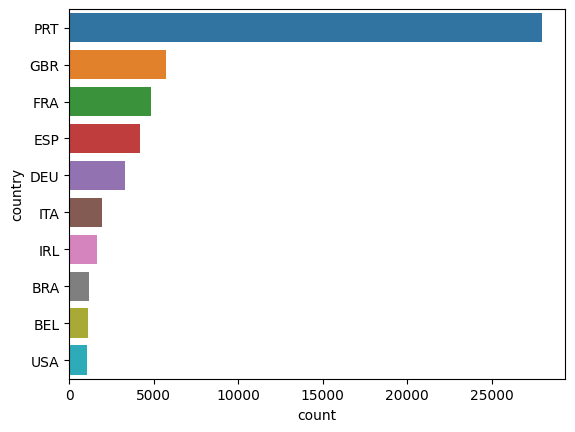

In [11]:
sns.countplot(data=reservas, y="country", order=reservas.country.value_counts().iloc[:10].index)

El pais con mas reservas de hotel del dataset es Portugal, con mas de 25.000

VARIABLE MARKET SEGMENT

In [12]:
reservas["market_segment"].unique()

array(['Online TA', 'Groups', 'Offline TA/TO', 'Direct', 'Complementary',
       'Corporate', 'Aviation', 'Undefined'], dtype=object)

Estas son todos los tipos de segmentos de mercado de todas las reservas de hotel del dataset

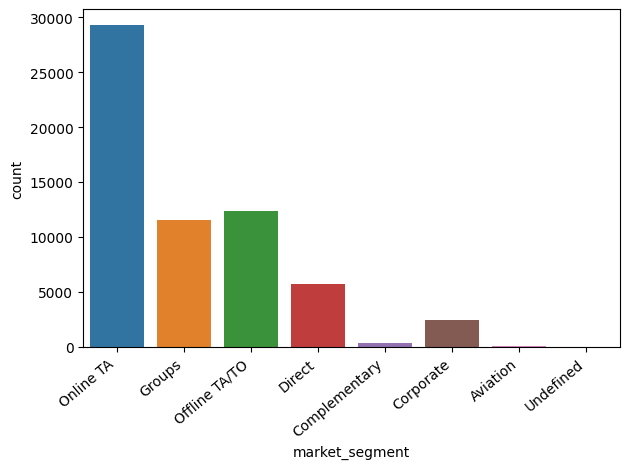

In [13]:
market_segment_grafic = sns.countplot(x='market_segment', data=reservas, )
market_segment_grafic.set_xticklabels(market_segment_grafic.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Vemos que Online TA es el segmento de mercado que está mas presente en todas las reservas de hotel

**VARIABLE DISTRIBUTION_CHANNEL**

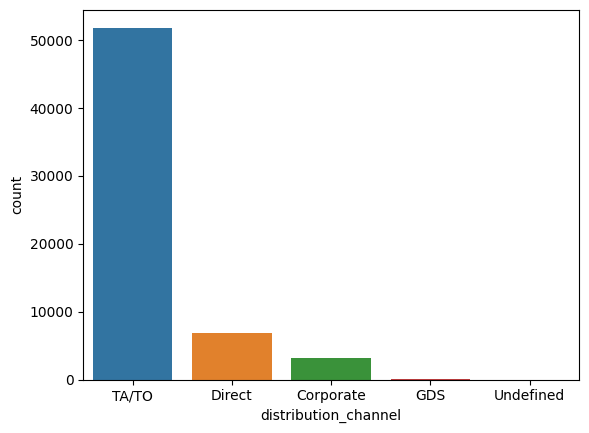

In [14]:
sns.countplot(x='distribution_channel', data=reservas, )
plt.show()

Vemos que el canal de distribucion que mas se repite en las reservas de hotel es TA/TO

**VARIABLE RESERVED_ROOM_TYPE**

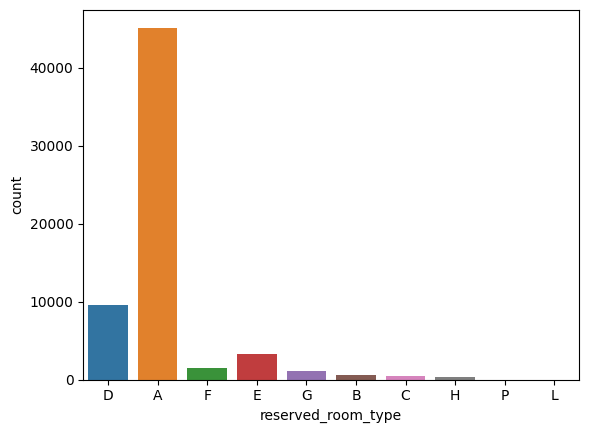

In [15]:
sns.countplot(x='reserved_room_type', data=reservas, )
plt.show()

Vemos que el tipo de reservas de habitacion son en su gran mayoria de tipo A

**VARIABLE ASSIGNED_ROOM_TYPE**

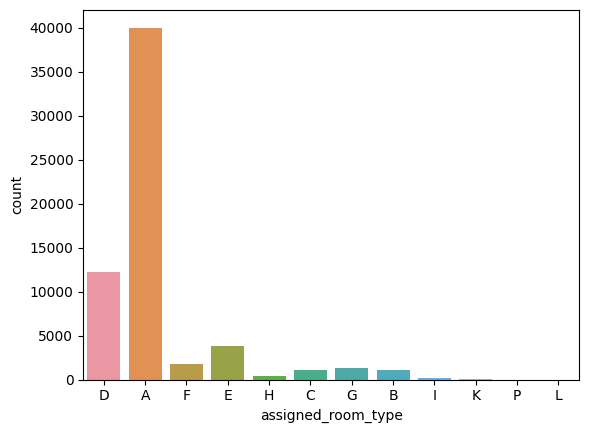

Cantidad de asignacion de habitacion de tipo D: 12190
Cantidad de reservas de habitacion de tipo D: 9585
Cantidad de asignacion de habitacion de tipo A: 40007
Cantidad de reservas de habitacion de tipo A: 45134


In [16]:
sns.countplot(x='assigned_room_type', data=reservas, )
plt.show()

print(f"Cantidad de asignacion de habitacion de tipo D: {reservas['assigned_room_type'].value_counts()['D']}")
print(f"Cantidad de reservas de habitacion de tipo D: {reservas['reserved_room_type'].value_counts()['D']}")

print(f"Cantidad de asignacion de habitacion de tipo A: {reservas['assigned_room_type'].value_counts()['A']}")
print(f"Cantidad de reservas de habitacion de tipo A: {reservas['reserved_room_type'].value_counts()['A']}")

Las distribuciones de los tipos de reserva y asignacion de habitaciones pueden parecer parecidas a simple vista por la escala de cantidad.

Observamos que la habitacion de tipo D tiene 2605 mas asignaciones que reservas.
Y la habitacion de tipo A tiene 5127 mas reservas que asignaciones

**VARIABLE DEPOSIT_TYPE**

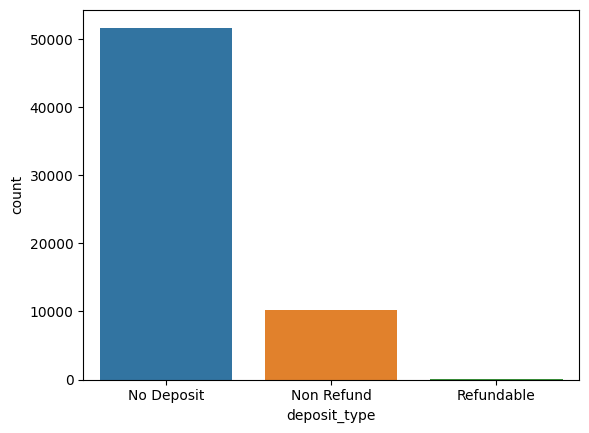

In [17]:
sns.countplot(x='deposit_type', data=reservas, )
plt.show()

Como vemos el el tipo de deposito mas comun es: No Deposit

**VARIABLE CUSTOMER_TYPE**

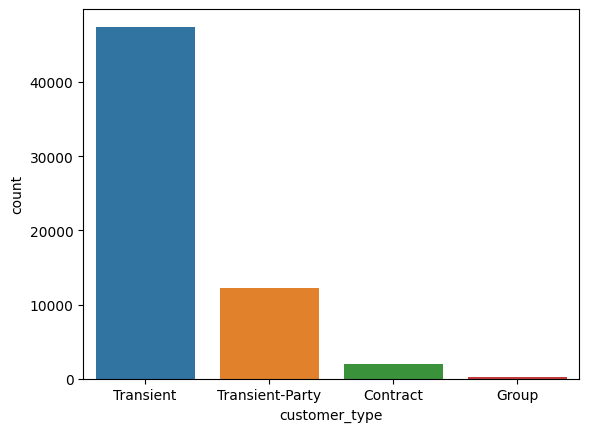

In [18]:
sns.countplot(x='customer_type', data=reservas, )
plt.show()

En el grafico se ve que el tipo de cliente mas habitual es el transitorio

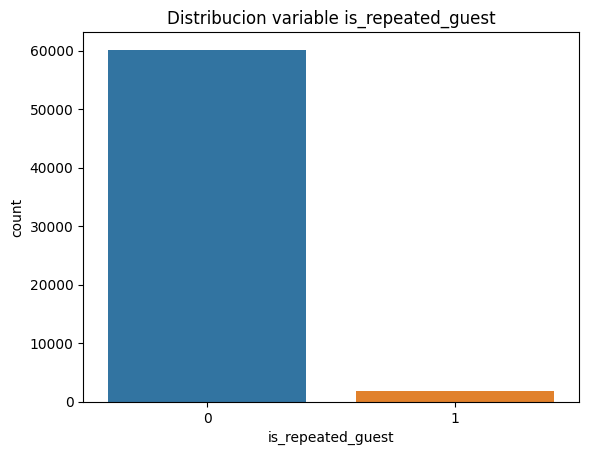

In [19]:
sns.countplot(x='is_repeated_guest', data=reservas)
plt.title("Distribucion variable is_repeated_guest")
plt.show()

Como vemos la mayoria de las reservas son de huespedes que no han reservado nunca

### Variables cuantitativas

Buscamos cuáles son las columnas numéricas del dataset

In [20]:
reservas_cuanti = reservas[reservas.select_dtypes(include=["int", "float"]).columns.to_list()].copy()
reservas_cuanti.drop(columns="is_canceled", inplace=True)
reservas_cuanti.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,49,2016,37,5,1,2,1,0.0,0,0,0,0,0,9.0,NaN,0,115.5,0,1
1,4,2015,44,31,0,1,2,0.0,0,0,0,0,0,NaN,NaN,0,42.0,1,0
2,25,2016,42,13,0,1,2,2.0,0,0,0,0,0,9.0,NaN,0,229.0,0,2
3,26,2016,51,12,2,5,2,0.0,0,0,0,0,0,154.0,NaN,0,75.0,0,0
4,104,2017,12,19,2,5,2,0.0,0,0,0,0,0,20.0,NaN,0,75.0,0,1


Calculamos la media, mediana y moda para cada variables

In [21]:
df = pd.DataFrame()
df["media"] = reservas_cuanti.mean().round(2)
df ["mediana"] = reservas_cuanti.median()
df["moda"] = reservas_cuanti.mode().squeeze()
df

,media,mediana,moda
lead_time,112.25,78.0,0.0
arrival_date_year,2016.15,2016.0,2016.0
arrival_date_week_number,27.22,28.0,33.0
arrival_date_day_of_month,15.79,16.0,17.0
stays_in_weekend_nights,0.92,1.0,0.0
stays_in_week_nights,2.51,2.0,2.0
adults,1.86,2.0,2.0
children,0.10,0.0,0.0
babies,0.01,0.0,0.0
is_repeated_guest,0.03,0.0,0.0


Creamos una lista para guardar los indices de las reservas que contienen valores atípicos univariados que vamos a eliminar posteriormente

In [22]:
reservas_atipicas_index = []

In [53]:
# Función para calcular el z score y zm score
def calcular_score(columna, dataset=reservas):
  outliers = dataset.copy()
  outliers["z_score"] = st.zscore(dataset[columna])

  mediana_lead_time=np.median(dataset[columna])
  MAD=np.median(np.absolute(dataset[columna] - mediana_lead_time))
  outliers["zm_score"] = (dataset[columna] - mediana_lead_time)*0.6745/MAD

  df1 = outliers[(outliers['z_score']>3)]
  df2 = outliers[(outliers['z_score']<-3)]
  df3 = outliers[(outliers['zm_score']>3.5)]
  df4 = outliers[(outliers['zm_score']<-3.5)]
  z_score_df = pd.concat([df1, df2]).drop_duplicates()
  zm_score_df = pd.concat([df3, df4]).drop_duplicates()
  return z_score_df, zm_score_df

 **VARIABLE LEAD_TIME**

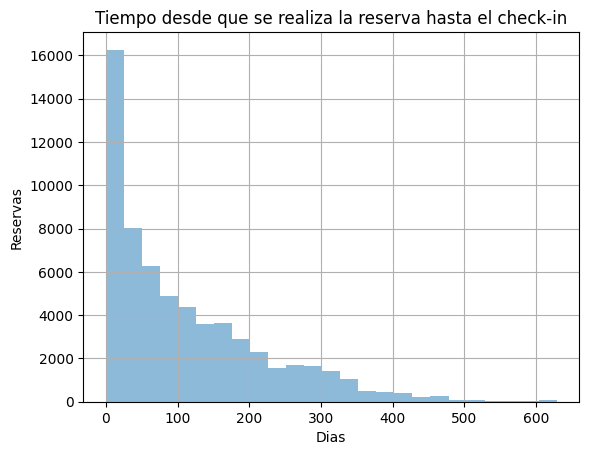

In [23]:
plt.title('Tiempo desde que se realiza la reserva hasta el check-in')
plt.hist(reservas['lead_time'], bins = 25 , alpha = 0.5)
plt.xlabel("Dias")
plt.ylabel("Reservas")
plt.grid(True)
plt.show()

Podemos ver que en la mayor cantidad de observaciones se acerca a casi nulo tiempo de espera

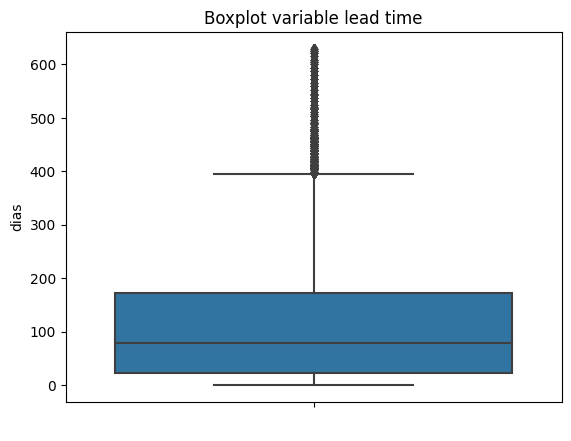

In [24]:
grf=sns.boxplot(y="lead_time", data=reservas).set(title="Boxplot variable lead time",xlabel=" ",ylabel="dias")

Podemos ver que hay muchos outliers univariados, procedemos a calcular su z-score y z-score modificado

In [28]:
z_score_df, zm_score_df = calcular_score("lead_time")
print(z_score_df.shape)
print(zm_score_df.shape)

(732, 33)
(1079, 33)


Analizamos qué porcentaje del dataset representan los outliers

In [ ]:
zm_score_df.shape[0]*100/reservas.shape[0]


1.7427680777865715

Decidimos remover estos outliers del dataset por los siguientes motivos:
- Sus valores de z score y z score modificado superan 3 y 3.5 respectivamente
- Representan una porción muy pequeña del dataset (1.74%)
- Se trata de casos poco comunes y muy extremos que no nos interesan estudiar

In [ ]:
reservas_atipicas_index.extend(zm_score_df.index.to_list())

**VARIABLE ARRIVAL_DATE_YEAR**




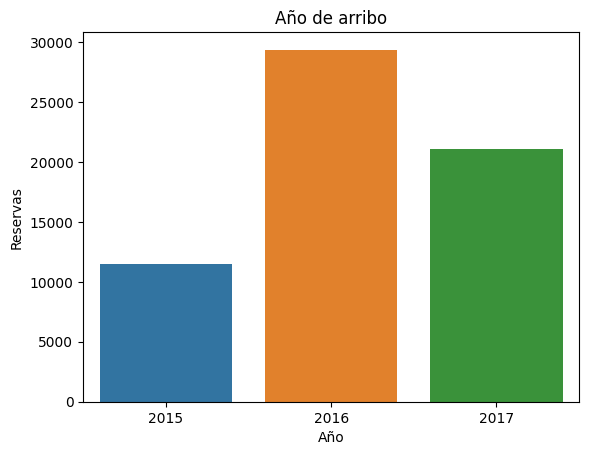

In [ ]:
sns.countplot(x='arrival_date_year', data=reservas)
plt.xlabel("Año")
plt.ylabel("Reservas")
plt.title("Año de arribo")
plt.show()

En 2016 hubo la mayor cantidad de huespedes.

**VARIABLE ARRIVAL_DATE_WEEK_NUMBER**

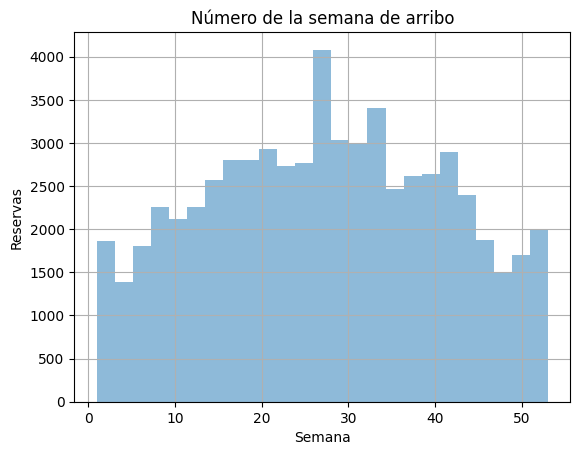

In [ ]:
plt.hist(reservas['arrival_date_week_number'], bins = 25, alpha = 0.5)
plt.xlabel("Semana")
plt.ylabel("Reservas")
plt.title("Número de la semana de arribo")
plt.grid(True)
plt.show()


Podemos ver que la mayor cantidad de gente llega a mitad de año

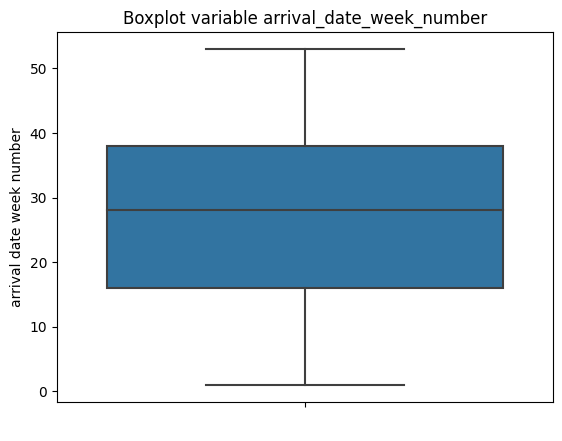

Max semana:  53
Min semana:  1


In [ ]:
grf=sns.boxplot(y="arrival_date_week_number", data=reservas).set(title="Boxplot variable arrival_date_week_number",xlabel=" ",ylabel="arrival date week number")
plt.show()
print("Max semana: ", max(reservas["arrival_date_week_number"]))
print("Min semana: ", min(reservas["arrival_date_week_number"]))

Vemos que no hay outliers univariados ya que los mínimos y máximos corresponden con el total de semanas de un año

**VARIABLE ARRIVAL_DATE_DAY_OF_MONTH**

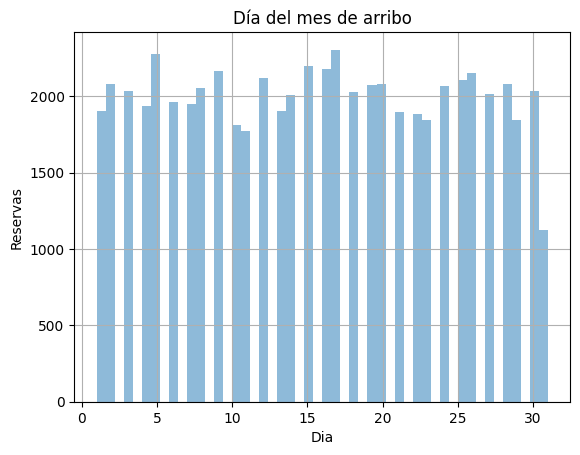

In [ ]:
plt.hist(reservas['arrival_date_day_of_month'], bins = 50, alpha = 0.5)
plt.xlabel("Dia")
plt.ylabel("Reservas")
plt.title("Día del mes de arribo")
plt.grid(True)
plt.show()

No hay ninguna tendencia en cuanto a días del mes más reservados

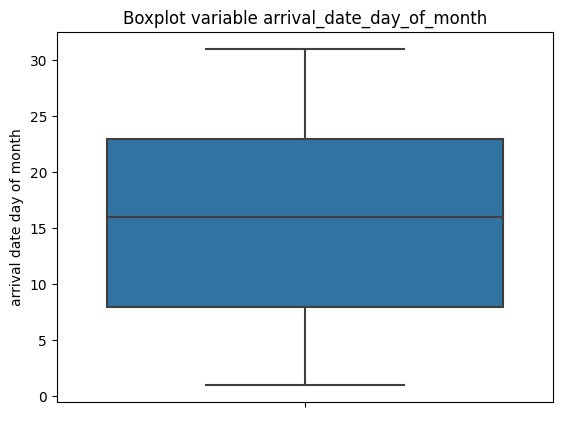

Max dia:  31
Min dia:  1


In [ ]:
grf=sns.boxplot(y="arrival_date_day_of_month", data=reservas).set(title="Boxplot variable arrival_date_day_of_month",xlabel=" ",ylabel="arrival date day of month")
plt.show()
print("Max dia: ", max(reservas["arrival_date_day_of_month"]))
print("Min dia: ", min(reservas["arrival_date_day_of_month"]))

No hay valores outliers univariados ya que el mínimo es 0 y el máximo es 31

**VARIABLE STAYS_IN_WEEKEND_NIGHTS**

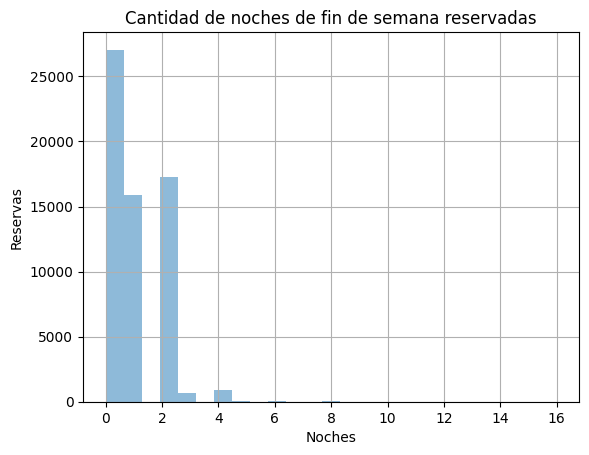

In [ ]:
plt.hist(reservas['stays_in_weekend_nights'], bins = 25, alpha = 0.5)
plt.xlabel("Noches")
plt.ylabel("Reservas")
plt.title("Cantidad de noches de fin de semana reservadas")
plt.grid(True)
plt.show()

La mayoría de las reservas no contienen noches del fin de semana

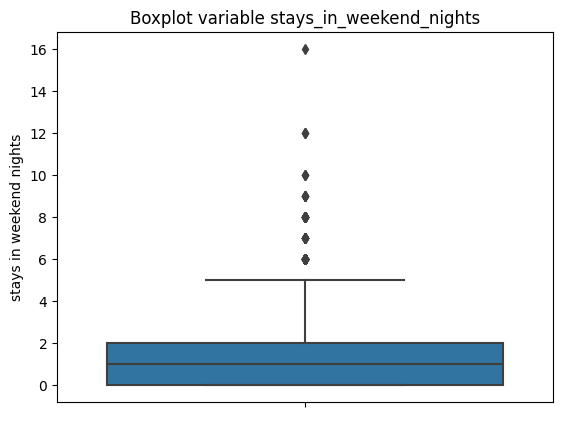

In [ ]:
grf=sns.boxplot(y="stays_in_weekend_nights", data=reservas).set(title="Boxplot variable stays_in_weekend_nights",xlabel=" ",ylabel="stays in weekend nights")

Vemos que hay valores de 12 y 16 dias de fin de semana, eso significa que se tuvo que quedar 6 y 8 fines de semana seguidos, lo cual es muy raro. Así que obtenemos la cantidad de noches de semana que se quedó

In [ ]:
reservas[["stays_in_weekend_nights","stays_in_week_nights"]].loc[reservas["stays_in_weekend_nights"]>10]

,stays_in_weekend_nights,stays_in_week_nights
31310,16,40
43667,12,30
54391,12,30
57428,12,30


A pesar de ser un valor alto, la cantidad de noches de semana reservadas concuerda por lo que podemos conlcuir que se trata de una reserva válida.

Procedemos a analizar su z-score y z-score modificado

In [54]:
z_score_df, zm_score_df = calcular_score("stays_in_weekend_nights")
print(z_score_df.shape)
print(zm_score_df.shape)

(1120, 33)
(62, 33)


Utilizamos la métrica del z score modificado ya que la gran cantidad de reservas con 0 noches distorsiona la métrica del z score y calculamos el porcentaje que representa del dataset

In [ ]:
zm_score_df.shape[0]*100/reservas.shape[0]

0.10014051976160096

In [ ]:
sorted(zm_score_df["stays_in_weekend_nights"].unique())

[7, 8, 9, 10, 12, 16]

Al ser un valor tan pequeño consideramos que podemos eliminar estos outliers sin perder mucha información. Eliminaríamos las estadías con 7 o más noches de fin de semana

In [ ]:
reservas_atipicas_index.extend(zm_score_df.index.to_list())

**VARIABLE STAYS_IN_WEEK_NIGHTS**

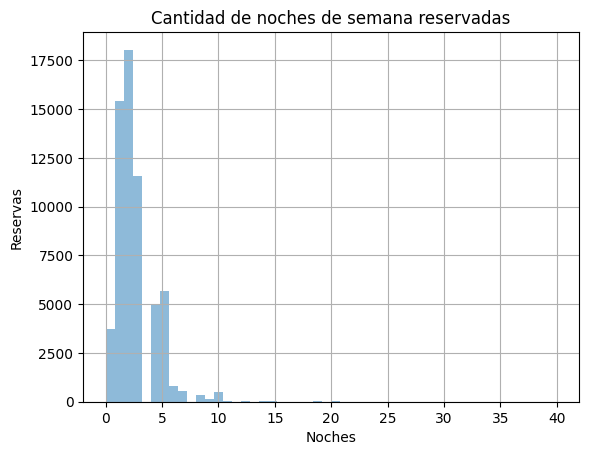

In [ ]:
plt.hist(reservas['stays_in_week_nights'], bins = 50, alpha = 0.5)
plt.xlabel("Noches")
plt.ylabel("Reservas")
plt.title("Cantidad de noches de semana reservadas")
plt.grid(True)
plt.show()

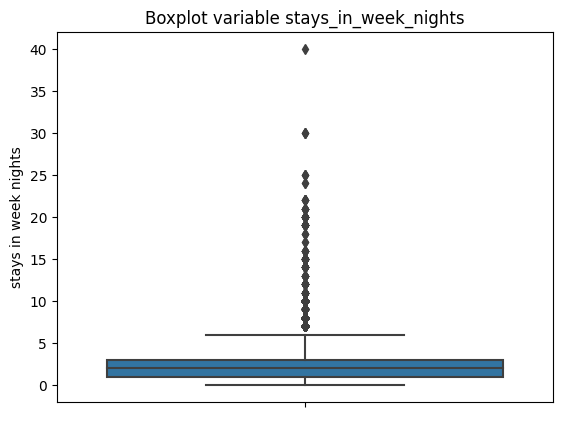

In [ ]:
grf=sns.boxplot(y="stays_in_week_nights", data=reservas).set(title="Boxplot variable stays_in_week_nights",xlabel=" ",ylabel="stays in week nights")

In [41]:
Q1 = np.quantile(reservas["stays_in_week_nights"], 0.25)
Q3 = np.quantile(reservas["stays_in_week_nights"], 0.75)
print(Q1)
print(Q3)

1.0
3.0


De acuerdo a los gráficos, la mayor cantidad de gente suele quedarse entre 1 (lower Q1) y 3 noches (upper Q3)

Calculamos el z score y z score modificado para los valores outliers

In [38]:
z_score_df, zm_score_df = calcular_score("stays_in_week_nights")
print(z_score_df.shape)
print(zm_score_df.shape)

(850, 33)
(1195, 33)


In [39]:
print(sorted(z_score_df["stays_in_week_nights"].unique()))
print(sorted(zm_score_df["stays_in_week_nights"].unique()))

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 30, 40]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 30, 40]


In [40]:
sorted(zm_score_df[zm_score_df["stays_in_weekend_nights"] >= 7]["stays_in_week_nights"].unique())

[15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 30, 40]

Vemos que la única diferencia entre ambos df es que uno abarca a estadías de 8 noches y el otro no.
A pesar de ser identificados como outliers porque se trata de estadías bastante largas en comparación a la mayoría que son cortas, no consideramos que todos sean valores que ameriten ser removidos del dataset y perdernos la información correspondiente a esas reservas.
Como previamente removimos los valores iguales o mayores a 7 noches de fines de semana, eso nos haría eliminar todos los valores de 15 noches en adelante, consideramos que esto es suficiente para eliminar los outliers univariados sin perder demasiada información

**VARIABLE ADULTS**

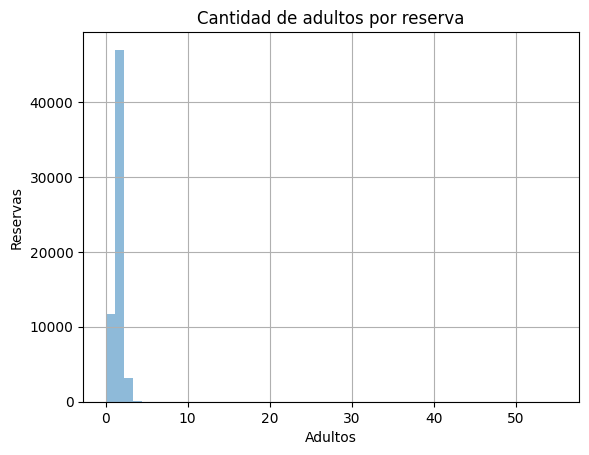

In [ ]:
plt.hist(reservas['adults'], bins = 50, alpha = 0.5)
plt.xlabel("Adultos")
plt.ylabel("Reservas")
plt.title("Cantidad de adultos por reserva")
plt.grid(True)
plt.show()

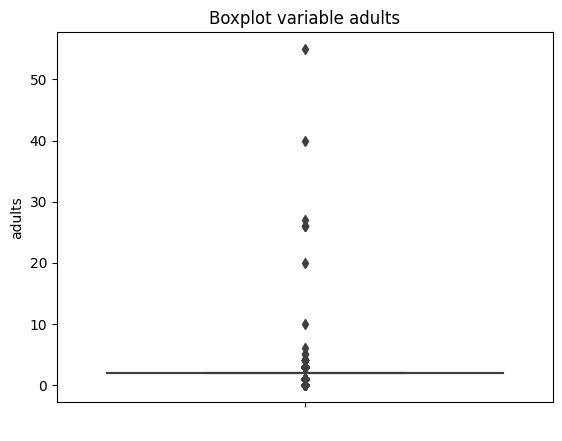

In [35]:
grf=sns.boxplot(y="adults", data=reservas).set(title="Boxplot variable adults",xlabel=" ",ylabel="adults")

Vemos que hay varios valores atipicos ya que la media es 1,8. Así que analizamos la distribución de los valores y sus métricas z score y z score modificado

In [ ]:
reservas[["adults", "lead_time"]].groupby(["adults"]).count()

,lead_time
adults,
0,197
1,11549
2,46962
3,3164
4,30
5,2
6,1
10,1
20,1


Como no es posible que haya reservas sin adultos procedemos a eliminar los valores que tienen 0 adultos y calcular el z scores para las observaciones restantes

In [44]:
z_score_df, zm_score_df = calcular_score("adults")
print(z_score_df.shape)
print(zm_score_df.shape)
print(sorted(z_score_df["adults"].unique()))
print(sorted(zm_score_df["adults"].unique()))

(238, 33)
(14951, 33)
[0, 4, 5, 6, 10, 20, 26, 27, 40, 55]
[0, 1, 3, 4, 5, 6, 10, 20, 26, 27, 40, 55]


Vemos que el z score modificado está incluyendo demasiados resultados así que miramos el valor de MAD

In [45]:
np.median(np.absolute(reservas["adults"] - np.median(reservas["adults"])))

0.0

Como MAD da 0, está asignando un z score modificado infinito a muchos valores, por lo que descartaremos esta medida y trabajaremos con el z score

In [46]:
z_score_df.shape[0]*100/reservas.shape[0]

0.3844103823106617

Ya que se trata de un porcentaje tan pequeño del dataset eliminaremos los valores con un z score mayor a 3

In [ ]:
reservas_atipicas_index.extend(z_score_df.index.to_list())

**VARIABLE CHILDREN**

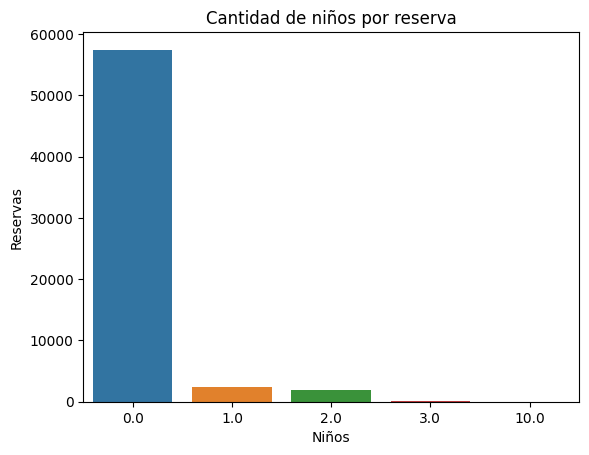

In [ ]:
sns.countplot(x='children', data=reservas,)
plt.xlabel("Niños")
plt.ylabel("Reservas")
plt.title("Cantidad de niños por reserva")
plt.show()

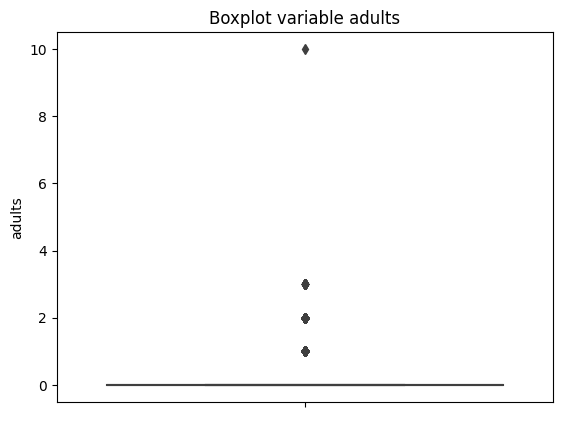

In [ ]:
grf=sns.boxplot(y="children", data=reservas).set(title="Boxplot variable adults",xlabel=" ",ylabel="adults")

Hay valores atipicos pero son posibles. Así que examinamos los casos más extremos en más detalle 3 y 10 niños y eliminamos los nan de la columna

In [55]:
reservas_ = reservas.copy()
reservas_["children"] = reservas["children"].fillna(0)
z_score_df, zm_score_df = calcular_score("children", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)

(1995, 33)
(4452, 33)


Vemos que ambas métricas incluyen demasiadas observaciones ya que se ven distorsionadas por la gran cantidad de ceros en la columna children. Igualmente, analizando la data podemos concluir que la única observación que resulta sospechosa es la de 10 niños así que la analizamos en más detalle

In [ ]:
reservas[reservas["children"]>=10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10.0,...,No Deposit,8.0,NaN,0,Contract,133.16,0,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


Al ser una reserva para sólo 2 adultos pero con 10 chicos decidimos eliminar esta observación del dataset

In [ ]:
reservas_atipicas_index.extend(reservas[reservas["children"]>=10].index.to_list())

**VARIABLE BABIES**


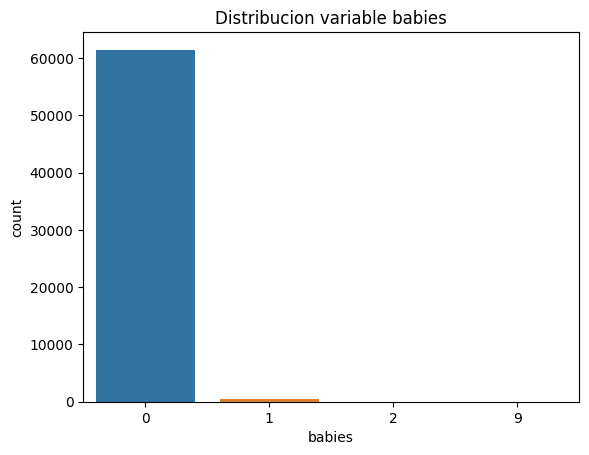

In [ ]:
sns.countplot(x='babies', data=reservas)
plt.title("Distribucion variable babies")
plt.show()

Como vemos la mayoria de las reservas tienen 0 bebes. Al ser tan distinta la escala en comparacion con las muestras con por lo menos 1 bebé, nos quedamos solo con estas (a partir de 1), para ver mejor la distribucion

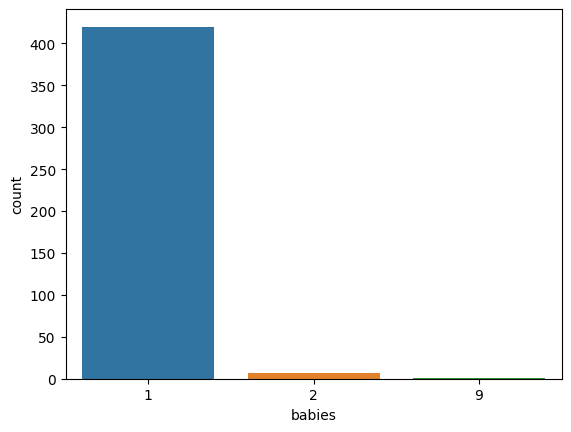

In [ ]:
reservas_0_babies = reservas.copy().loc[(reservas['babies']!=0)]
sns.countplot(x='babies', data=reservas_0_babies)
plt.show()

Vemos que, la mayoria de las reservas que tienen bebes son en su mayoria con solo 1.


In [ ]:
reservas[reservas['babies'] == 9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,...,No Deposit,95.0,NaN,0,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0


Analizando la unica reserva con 9 bebes, teniendo en cuenta de que hay un solo adulto y fue reservada con solo 11 dias de anticipacion. Deducimos que se trata de un error en la carga de la reserva por lo que eliminaremos esta reserva

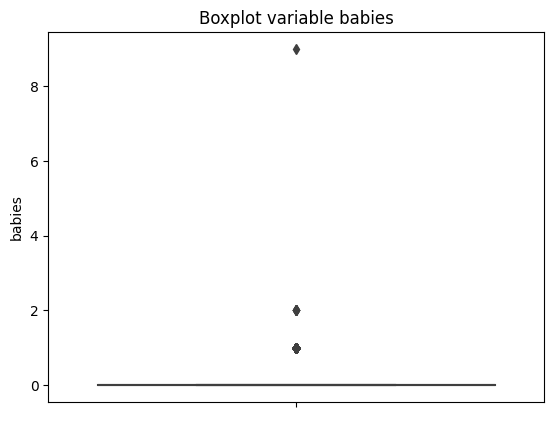

In [ ]:
grf=sns.boxplot(y="babies", data=reservas).set(title="Boxplot variable babies",xlabel=" ",ylabel="babies")

En el grafico boxplot se puede ver claramente el valor atipico de reserva con 9 bebes

In [ ]:
reservas_atipicas_index.extend(reservas[reservas['babies'] == 9].index.to_list())

**VARIABLE PREVIOUS_CANCELLATIONS**

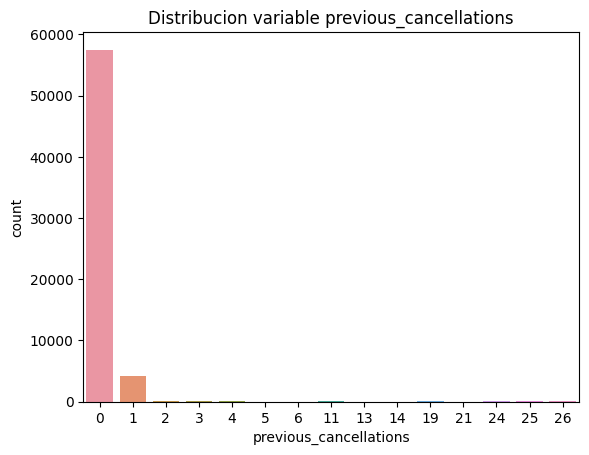

In [ ]:
sns.countplot(x='previous_cancellations', data=reservas)
plt.title("Distribucion variable previous_cancellations")
plt.show()

La mayoria de la reservas nunca cancelaron, lo cual tiene sentido porque la mayoria de las reservas son de gente que nunca antes habia reservado. <br>
Despues observamos que de las reservas de gente que si canceló alguna previamente la mayor frecuencia es de una sola cancelacion. <br>
Para poder visualizar mejor la cantidad de reservas con mas numeros de cancelacoines, eliminamos estos dos valores analizados del grafico

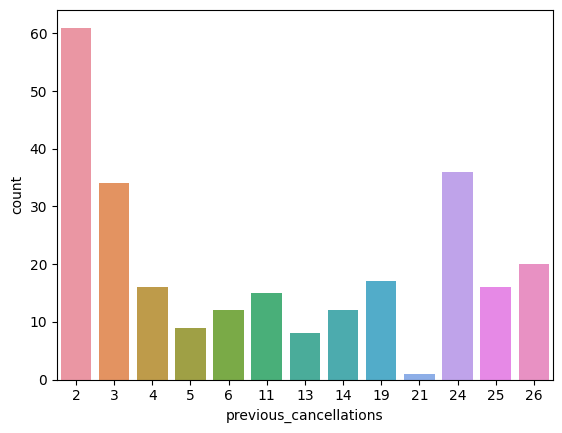

In [ ]:
reservas_cancellations = reservas.copy().loc[(reservas['previous_cancellations'] !=1 ) & (reservas['previous_cancellations'] != 0)]
sns.countplot(x='previous_cancellations', data=reservas_cancellations)
plt.show()

Como vemos la cantidad de reservas con cancelaciones previas va en bajada desde 2 cancelaciones hasta 5. Apartir de ahi las cantidades empiezan a subir y bajar arbitrariamente por lo que consideramos que son valores mal cargados. Estas reservas van a ser eliminadas en el apartado de valores atipicos

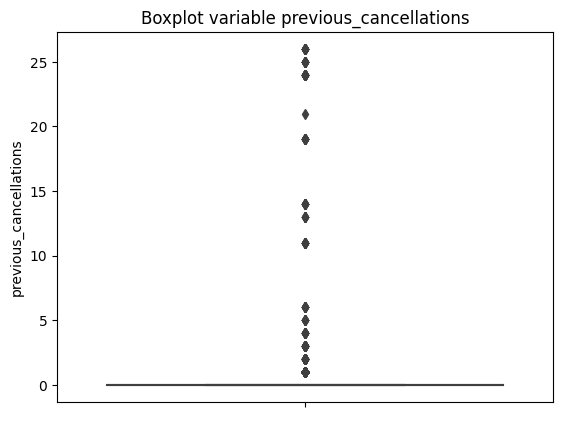

In [ ]:
grf=sns.boxplot(y="previous_cancellations", data=reservas).set(title="Boxplot variable previous_cancellations",xlabel=" ",ylabel="previous_cancellations")

Utilizamos z-score y z-score modficado para un mejor analisis de outliers

In [59]:
reservas_ = reservas.loc[reservas["previous_cancellations"]>0]
z_score_df, zm_score_df = calcular_score("previous_cancellations", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)
print(reservas[reservas["previous_cancellations"] > 5].shape)

(110, 33)
(257, 33)
(137, 31)


Segun el boxplot y z-score modificado, las reservas con mas de 1 cancelacion son outliers, pero como son valores posibles y que estan dentro de nuestro campo de estudio tomamos solo como outliers las reservas que superan las 5 cancelaciones previas, ya que este es un valor mas raro, y porque ademas son reservas aisladas que no nos interesan. Y como representan un pequeño porcentaje de nuestro total de datos, los eliminamos

In [ ]:
reservas_atipicas_index.extend(reservas[reservas["previous_cancellations"] > 5].index.tolist())

**VARIABLE PREVIOUS_BOOKINGS_NOT_CANCELED**

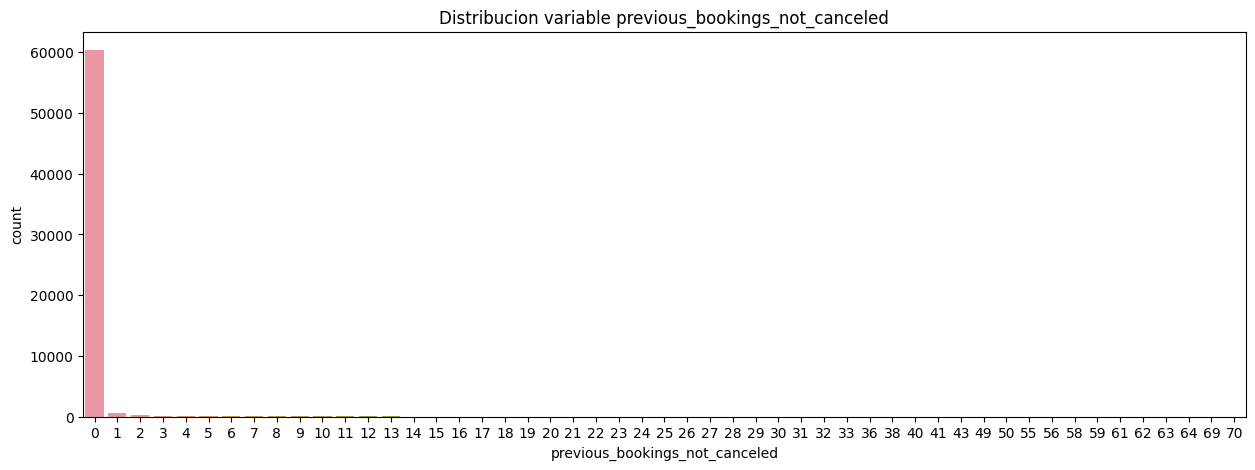

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='previous_bookings_not_canceled', data=reservas)
plt.title("Distribucion variable previous_bookings_not_canceled")
plt.show()

La mayoria de reservas no tienen previas reservas no canceladas, vamos a ver la distribucion de las que si

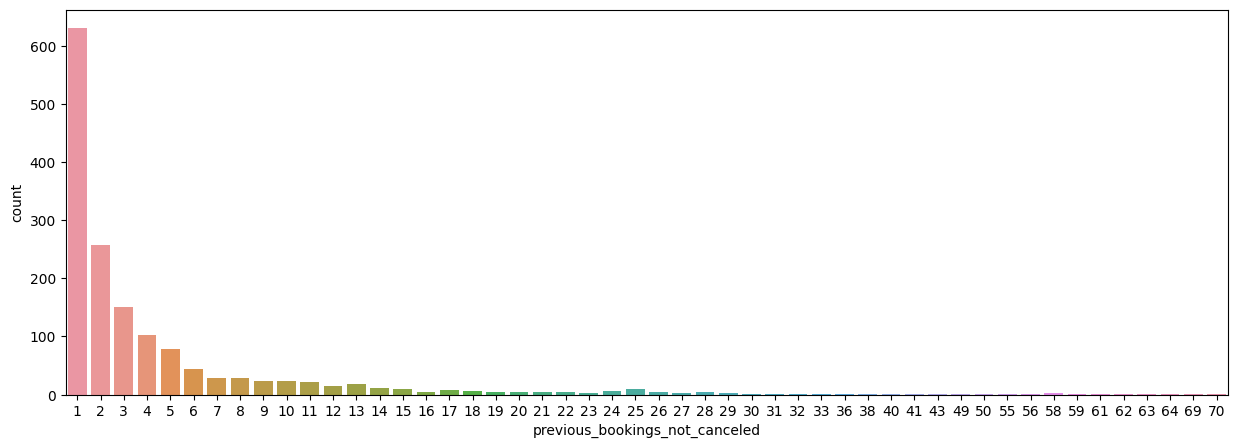

In [ ]:
reservas_not_cancellations = reservas.copy().loc[reservas['previous_bookings_not_canceled'] != 0]
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='previous_bookings_not_canceled', data=reservas_not_cancellations)
plt.show()

Vemos que las reservas que han sido canceladas hasta 5 vez, conforman el mayor porcentaje de reservas con cancelaciones. Las eliminamos para ver la distribucion de las reservas con mas de 5 cancelacion (la cual no está muy clara en este gráfico), para ver si nos dicen algo

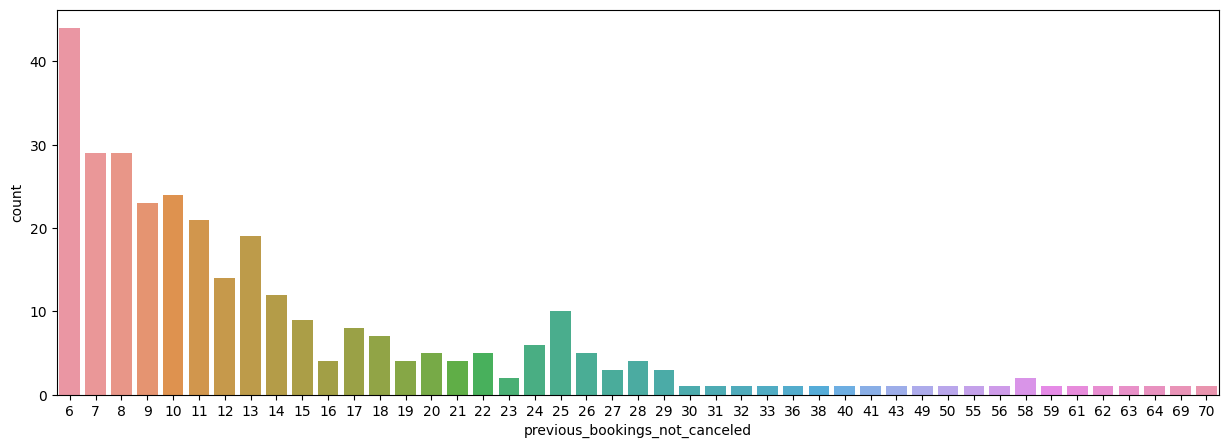

In [ ]:
reservas_not_cancellations = reservas.copy().loc[(reservas['previous_bookings_not_canceled'] != 0) & (reservas['previous_bookings_not_canceled'] != 1) & (reservas['previous_bookings_not_canceled'] != 2) & (reservas['previous_bookings_not_canceled'] != 3) & (reservas['previous_bookings_not_canceled'] != 4) & (reservas['previous_bookings_not_canceled'] != 5)]
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='previous_bookings_not_canceled', data=reservas_not_cancellations)
plt.show()

Observamos que las reservas bajan exponencialmente cuando aumentan el numero de cancelaciones

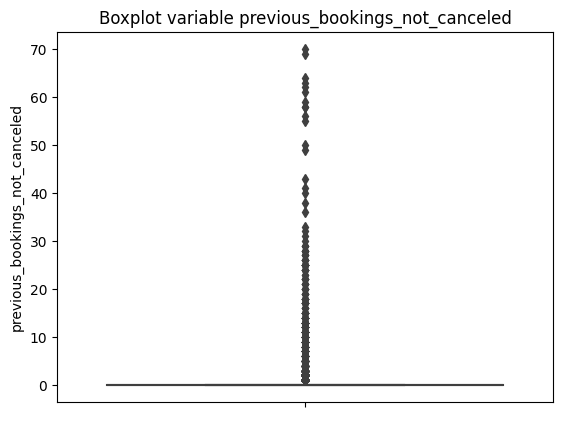

In [ ]:
grf=sns.boxplot(y="previous_bookings_not_canceled", data=reservas).set(title="Boxplot variable previous_bookings_not_canceled",xlabel=" ",ylabel="previous_bookings_not_canceled")

Como la mayoria de reservas no tienen cancelaciones previas, sucede que todas las que si tienen figuran como outliers. Eliminamos las reservas con 0 cancelaciones previas para poder visualizar mejor el grafico

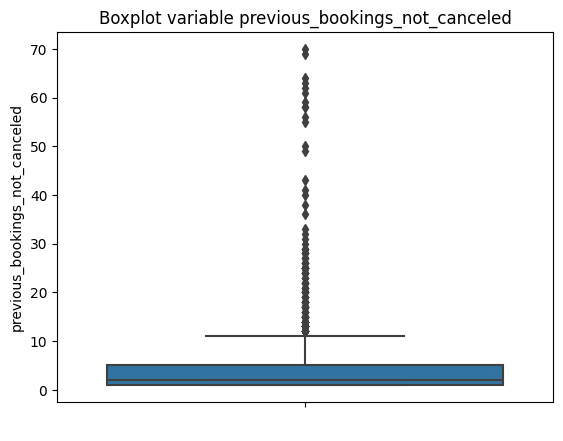

In [ ]:
grf=sns.boxplot(y="previous_bookings_not_canceled", data=reservas.loc[reservas["previous_bookings_not_canceled"] != 0]).set(title="Boxplot variable previous_bookings_not_canceled",xlabel=" ",ylabel="previous_bookings_not_canceled")

In [ ]:
# Valor máximo de cantidad de cancelaciones previas de una reserva
Q1_peso=np.quantile(reservas[reservas["previous_bookings_not_canceled"] != 0]["previous_bookings_not_canceled"],0.25)
Q3_peso=np.quantile(reservas[reservas["previous_bookings_not_canceled"] != 0]["previous_bookings_not_canceled"],0.75)

IQR_peso=Q3_peso-Q1_peso

out_sup=Q3_peso+1.5*IQR_peso
out_sup

11.0

El boxplot nos dice que a partir de reservas con 11 cancelaciones los valores son outliers. Estudiamos z-score y z-score modficado

In [60]:
reservas_ = reservas.loc[reservas["previous_bookings_not_canceled"]>0]
z_score_df, zm_score_df = calcular_score("previous_bookings_not_canceled", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)
print(reservas[reservas["previous_bookings_not_canceled"] > 10].shape)

(29, 33)
(243, 33)
(167, 31)


In [61]:
print(f'El porcentaje de valores atipicos sobre el total de reservas es: {(zm_score_df.shape[0]*100)/reservas.shape[0]}%')

El porcentaje de valores atipicos sobre el total de reservas es: 0.3924862306785328%


Como el porcentaje es super bajo, los eliminamos ya que son valores que no nos interesan en nuestro estudio

In [ ]:
reservas_atipicas_index.extend(zm_score_df.index.tolist())

**VARIABLE BOOKING_CHANGES**

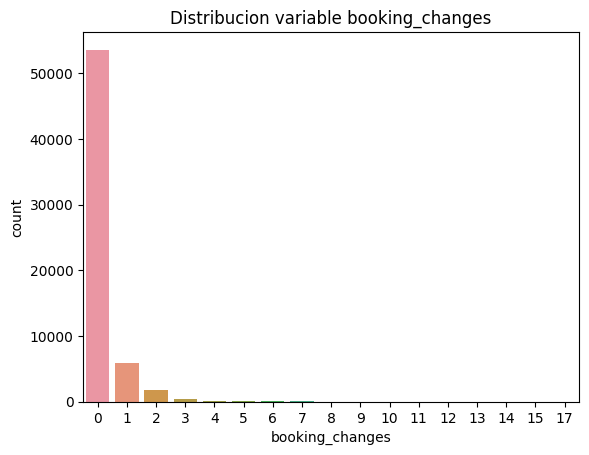

In [ ]:
sns.countplot(x='booking_changes', data=reservas)
plt.title("Distribucion variable booking_changes")

plt.show()

La mayoria de reservas no tienen cambios. Veremos la distribucion de las reservas que si tienen cambios

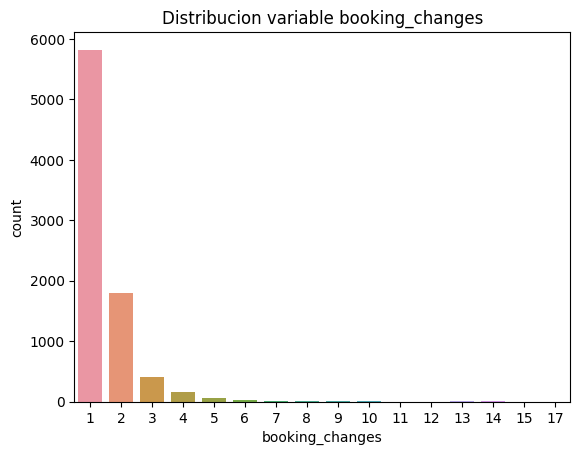

In [ ]:
sns.countplot(x='booking_changes', data=reservas[reservas["booking_changes"] != 0])
plt.title("Distribucion variable booking_changes")

plt.show()

En comparacion con las reservas que no tienen cambios, las que tienen por lo menos 1 son pocas. Y van disminuyendo exponencialmente a medida que aumenta el numero de cambios por reserva

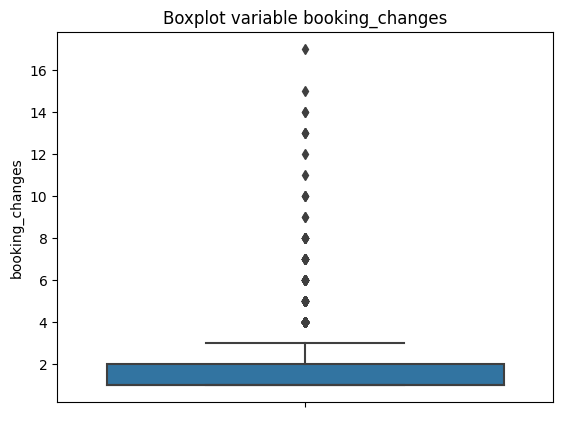

In [ ]:
grf=sns.boxplot(y="booking_changes", data=reservas.loc[reservas["booking_changes"] != 0]).set(title="Boxplot variable booking_changes",xlabel=" ",ylabel="booking_changes")

In [62]:
reservas_ = reservas.loc[reservas["booking_changes"]>0]
z_score_df, zm_score_df = calcular_score("booking_changes", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)
print(reservas[reservas["booking_changes"] > 3.5].shape)

(130, 33)
(2496, 33)
(294, 31)


No tomamos en cuenta el valor 0 para cambios de reserva ya que tienen una distribucion muy grande en comparacion con las que si lo tienen. El boxplot nos dice que a partir de 4 cambios, la reserva es un outlier. Analizamos z-score y z-score modificado

Como no nos da mucha informacion estudiamos los outliers mas cercanos que nos da el boxplot

Nos interesa saber que reservas tuvieron mas de 3.5 cambios (ya que segun el boxplot son outliers) y ademas tuvieron un tiempo de espera hasta el checking de menos de 3 dias, ya que no tiene sentido que en tan pocos dias de espera a la llegada del hotel hagas tantos cambios

In [ ]:
reservas[(reservas["booking_changes"] > 3.5) & (reservas["lead_time"] < 3)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
100,Resort Hotel,0,2016,January,2,4,2,5,2,0.0,...,No Deposit,NaN,NaN,0,Transient,48.00,0,0,134b7af1-106d-4bb8-9901-2f15bffb021c,0
7995,Resort Hotel,0,2015,October,44,28,0,3,1,0.0,...,No Deposit,NaN,NaN,0,Transient,42.00,1,0,6991b323-ceff-423e-a44a-8b78a0285fda,0
9282,City Hotel,2,2017,August,31,3,0,1,2,1.0,...,No Deposit,509.0,NaN,0,Transient-Party,216.50,0,1,92a56bfd-b783-4656-b90d-894b76d40622,0
10914,City Hotel,0,2016,January,4,20,1,4,2,0.0,...,No Deposit,NaN,NaN,0,Transient,78.40,0,0,bef36132-66b1-4908-a86f-3ee79f9f1107,0
20960,City Hotel,0,2016,December,53,27,0,2,2,2.0,...,No Deposit,9.0,NaN,0,Transient,178.50,0,1,ea99bf1a-f522-4182-b423-c06424ba83db,0
22414,City Hotel,0,2016,February,8,18,2,8,2,0.0,...,No Deposit,NaN,NaN,0,Transient,89.00,0,1,3b0e1f4e-aac7-45aa-ab7e-b50ab11b6765,0
27756,City Hotel,0,2017,March,9,4,4,7,0,0.0,...,No Deposit,9.0,NaN,0,Transient,8.00,0,0,e727ef98-ea86-4a94-b39e-e63613925a32,0
30245,City Hotel,2,2017,June,26,26,1,1,2,0.0,...,No Deposit,14.0,NaN,0,Transient,146.67,0,1,5170412e-31ee-438a-b4b4-3043defc3c10,0
37428,City Hotel,2,2016,November,47,16,2,8,0,0.0,...,No Deposit,371.0,NaN,0,Transient-Party,0.00,0,0,1994cad0-b21d-48a3-9635-5b2f6209888b,0
39158,City Hotel,1,2017,April,14,3,5,11,1,0.0,...,No Deposit,NaN,NaN,0,Transient,150.00,0,2,3491c49b-6fa8-4e2d-ae2a-4558286c831e,0


In [ ]:
reservas[(reservas["booking_changes"] > 15)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
46642,City Hotel,159,2016,May,22,26,0,3,2,1.0,...,No Deposit,9.0,NaN,0,Transient,119.85,0,1,503098f2-88ef-4de1-81a6-626e263ee313,0


Y ademas eliminamos esta reserva que tiene mas de 15 cambios ya que es una reserva aislada (está lejos de los demas valores de cambios) y no nos interesa estudiarla

In [ ]:
reservas_atipicas_index.extend(reservas[(reservas["booking_changes"] > 3.5) & (reservas["lead_time"] < 3)].index.tolist())
reservas_atipicas_index.extend(reservas[(reservas["booking_changes"] > 15)].index.tolist())

**VARIABLE AGENT**

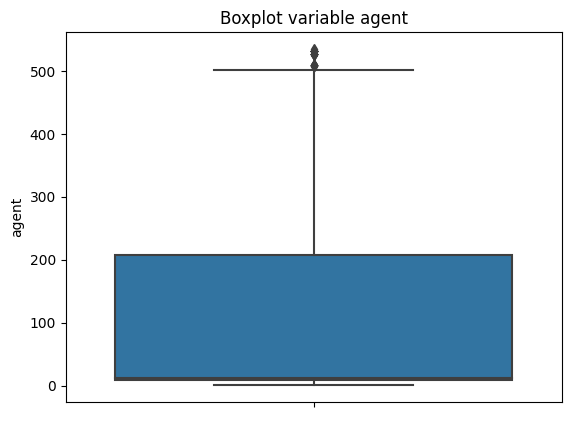

In [ ]:
grf=sns.boxplot(y="agent", data=reservas).set(title="Boxplot variable agent",xlabel=" ",ylabel="agent")

El boxplot no nos brinda informacion ya que la variable agent contiene el id de la agencia

**VARIABLE COMPANY**

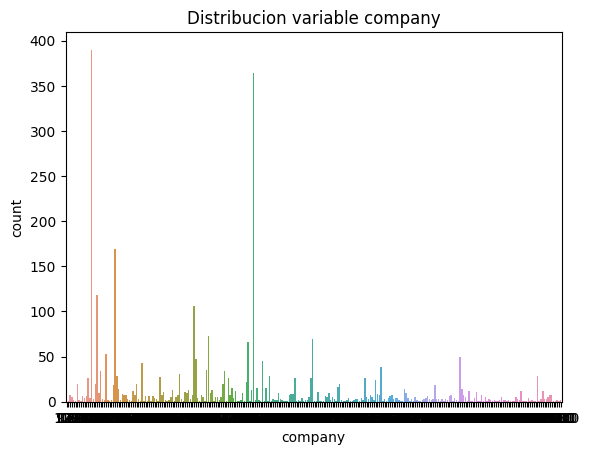

In [ ]:
sns.countplot(x='company', data=reservas)
plt.title("Distribucion variable company")

plt.show()

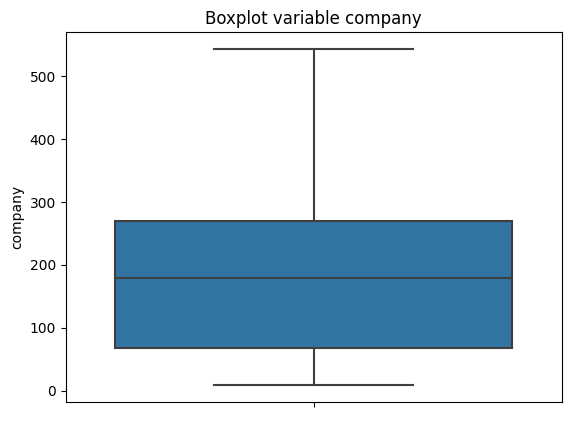

In [ ]:
grf=sns.boxplot(y="company", data=reservas).set(title="Boxplot variable company",xlabel=" ",ylabel="company")

Al igual que la variable agent, los valores son id por lo que no se pueden analizar sus graficos de distribucion ni boxplots

**VARIABLE DAYS_IN_WAITING_LIST**

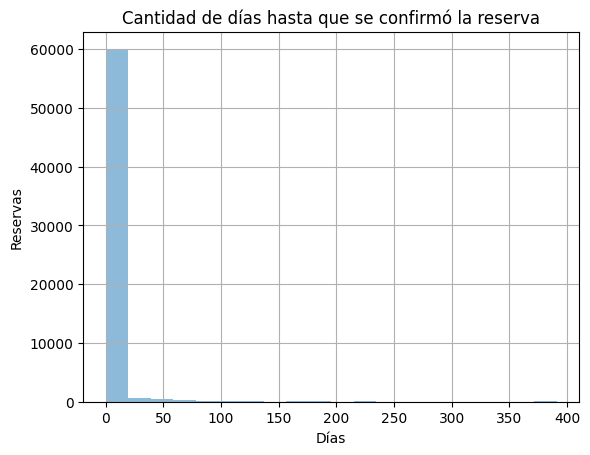

In [ ]:
plt.hist(reservas['days_in_waiting_list'], bins = 20, alpha = 0.5)
plt.xlabel("Días")
plt.ylabel("Reservas")
plt.title("Cantidad de días hasta que se confirmó la reserva")
plt.grid(True)
plt.show()

La mayor cantidad de reservas se realizan instantáneamente, por lo que quitamos este caso para analizar el resto

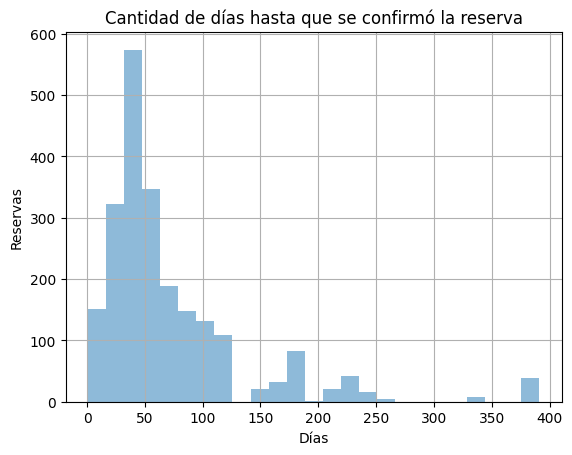

In [ ]:
plt.hist([value for value in reservas['days_in_waiting_list'] if value > 0], bins = 25, alpha = 0.5)
plt.xlabel("Días")
plt.ylabel("Reservas")
plt.title("Cantidad de días hasta que se confirmó la reserva")
plt.grid(True)
plt.show()

Sacando este dato vemos que la mayoría de las reservas tienen menos de 50 días de anticipación

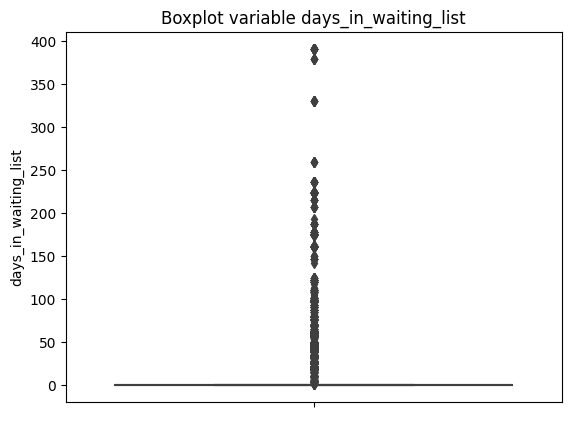

In [ ]:
grf=sns.boxplot(y="days_in_waiting_list", data=reservas).set(title="Boxplot variable days_in_waiting_list",xlabel=" ",ylabel="days_in_waiting_list")


Una vez más la gran cantidad de ceros distorsiona el gráfico del boxplot así que removemos este valor

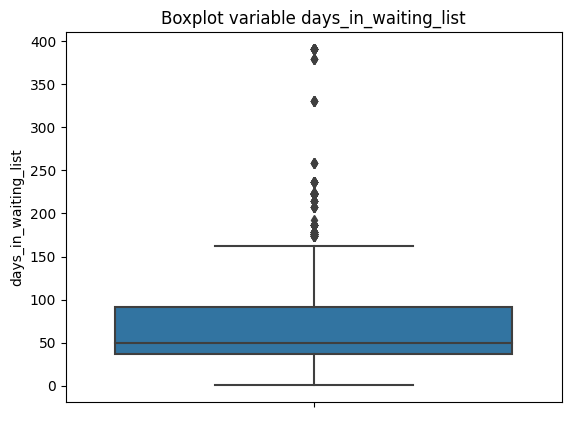

In [ ]:
grf=sns.boxplot(y="days_in_waiting_list", data=reservas.loc[reservas["days_in_waiting_list"]>0]).set(title="Boxplot variable days_in_waiting_list",xlabel=" ",ylabel="days_in_waiting_list")

Y ahora sí podemos tener un gráfico más representativos de los valores outliers. Para tener mas informacion, evaluamos z-score y z-score modificado de los valores (exceptuando el 0)

In [64]:
reservas_ = reservas.loc[reservas["days_in_waiting_list"]>0]
z_score_df, zm_score_df = calcular_score("days_in_waiting_list", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)
print(reservas[reservas["days_in_waiting_list"] > 150].shape)

(45, 33)
(247, 33)
(243, 31)


Esto nos dice que las reservas con mas de 150 dias en la lista de espera, son valores atipicos tanto para el boxplot como para elz-score modificado, por lo que decidimos eliminarlos

In [ ]:
reservas_atipicas_index.extend(zm_score_df.index.tolist())

**VARIABLE ADR**

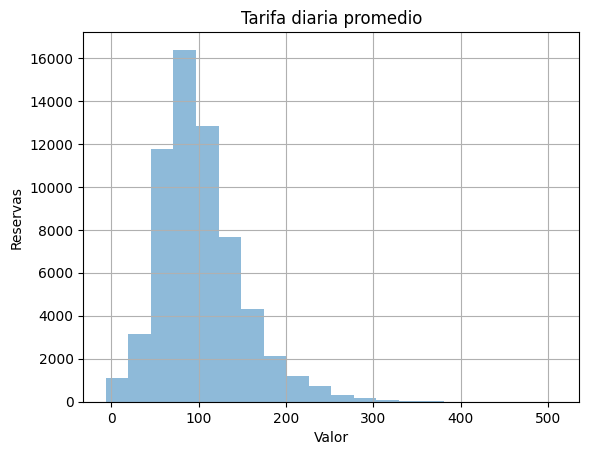

In [ ]:
plt.hist(reservas['adr'], bins = 20, alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Reservas")
plt.title("Tarifa diaria promedio")
plt.grid(True)
plt.show()

La mayoría de las reservas tienden a ser de precios bajos

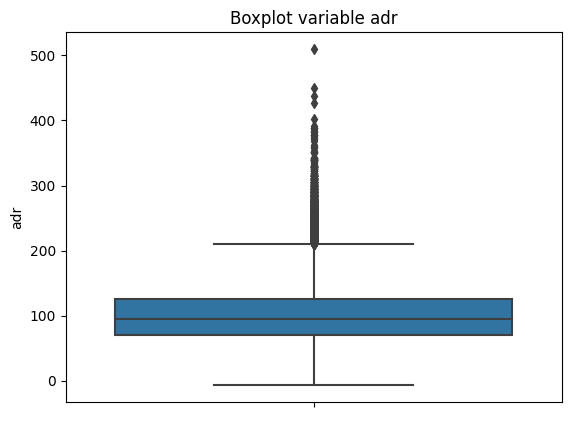

In [ ]:
grf=sns.boxplot(y="adr", data=reservas).set(title="Boxplot variable adr",xlabel=" ",ylabel="adr")

Y encontramos muchos valores que calificarían como outliers. Por lo que calculamos z-score

In [66]:
z_score_df, zm_score_df = calcular_score("adr")
print(z_score_df.shape)
print(zm_score_df.shape)
print(reservas[reservas["adr"] > 200].shape)


(774, 33)
(951, 33)
(2574, 31)


Basados en los valores atipicos segun z-score, z-score modificado y boxplot calculamos el porcentaje de los valores atipicos dados por el z-score modificado sobre la cantidad total de reservas:

In [67]:
print(f'Porcentaje de valores atipicos de la variable adr: {(zm_score_df.shape[0]*100)/reservas.shape[0]}%' )

Porcentaje de valores atipicos de la variable adr: 1.5360263595690726%


No representan una cantidad representativa de nuestro conjunto de datos, y como son valores atipicos según nuestro analisis, los eliminamos

In [ ]:
reservas_atipicas_index.extend(zm_score_df.index.tolist())

**VARIABLE REQUIRED_CAR_PARKING_SPACES**

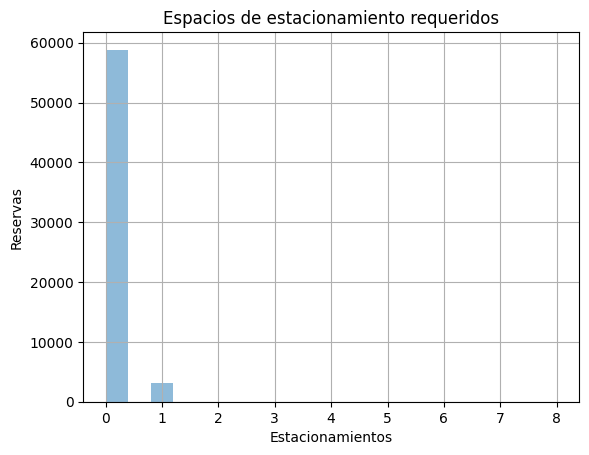

In [ ]:
plt.hist(reservas['required_car_parking_spaces'], bins = 20, alpha = 0.5)
plt.xlabel("Estacionamientos")
plt.ylabel("Reservas")
plt.title("Espacios de estacionamiento requeridos")
plt.grid(True)
plt.show()

Muy pocas personas solicitaron más de 1 espacio de estacionamiento

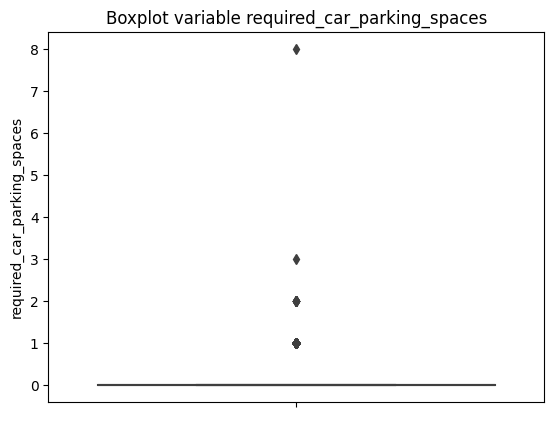

In [ ]:
grf=sns.boxplot(y="required_car_parking_spaces", data=reservas).set(title="Boxplot variable required_car_parking_spaces",xlabel=" ",ylabel="required_car_parking_spaces")

Vemos que una vez más la gran cantidad de ceros distorsiona el gráfico de boxplot y aunque muestre 1 como outlier este es un valor perfectamente probable. Por lo que analizaremos más en profundidad los valores a partir de 1.

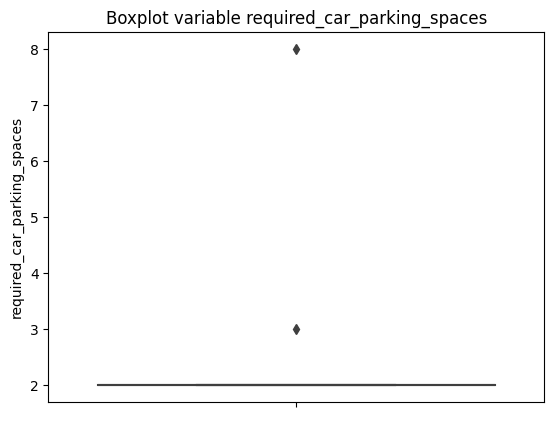

In [ ]:
grf=sns.boxplot(y="required_car_parking_spaces", data=reservas[reservas["required_car_parking_spaces"] > 1]).set(title="Boxplot variable required_car_parking_spaces",xlabel=" ",ylabel="required_car_parking_spaces")

El grafico de boxplot se sigue comportando de tal manera que toma a valores no tan raros como outliers por la cantidad de reservas con con menor numero de espacios de estacionamiento. Analizamos z-score

In [68]:
reservas_ = reservas.loc[reservas["required_car_parking_spaces"]>1]
z_score_df, zm_score_df = calcular_score("required_car_parking_spaces", reservas_)
print(z_score_df.shape)
print(zm_score_df.shape)

(1, 33)
(2, 33)


Como solo hay 2 reservas con mas de 2 requerimiento de estacionamiento, los estudiamos

In [ ]:
reservas[reservas["required_car_parking_spaces"] > 2]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
8269,Resort Hotel,138,2017,March,12,19,2,2,2,0.0,...,No Deposit,NaN,NaN,122,Transient-Party,80.0,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0
13713,Resort Hotel,205,2017,June,26,26,3,10,2,0.0,...,No Deposit,250.0,NaN,0,Transient,111.0,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0


Como vemos ambas reservas son solo con 2 adultos. Por lo que no tiene sentido el pedir mas 2 de dos espacios de estacionamiento. En el caso de la primer reserva pide 8 espacios de estacionamiento y se queda solo 4 dias, asi que lo consideramos outlier y lo eliminamos.
Y en el caso de la segunda, son solo 2 adultos por lo que no tiene sentido pedir 2 espacios de estacionamiento

In [ ]:
reservas_atipicas_index.extend(reservas[reservas["required_car_parking_spaces"] > 2].index.tolist())

**VARIABLE TOTAL_OF_SPECIAL_REQUESTS**

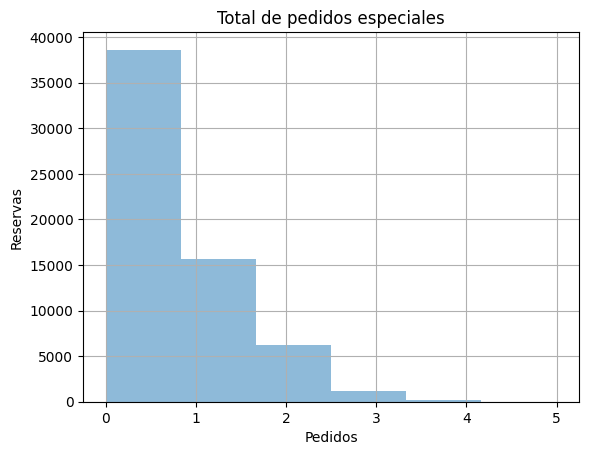

In [ ]:
plt.hist(reservas['total_of_special_requests'], bins = 6, alpha = 0.5)
plt.xlabel("Pedidos")
plt.ylabel("Reservas")
plt.title("Total de pedidos especiales")
plt.grid(True)
plt.show()


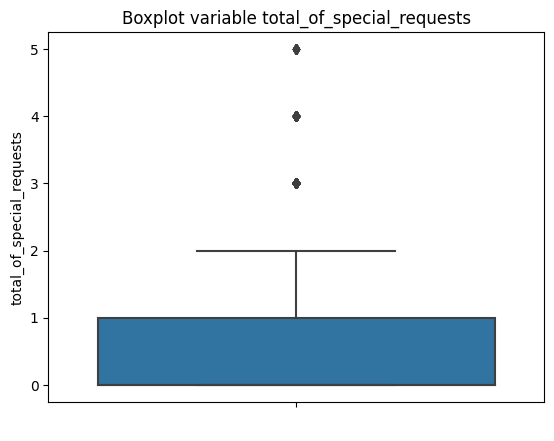

In [ ]:
grf=sns.boxplot(y="total_of_special_requests", data=reservas).set(title="Boxplot variable total_of_special_requests",xlabel=" ",ylabel="total_of_special_requests")


Segun el boxplot, las reservas con mas de 2 pedidos especiales son outliers. Pero como tener 5 pedidos especiales en una reserva de hotel no es un valor raro y no perjudica nuestro campo de estudio, no eliminamos estos valores.

## Limpieza del dataset
Eliminamos todas las filas que determinamos a través del análisis univariado de valores atípicos de cada variable

In [ ]:
reservas_limpio = reservas.drop(list(set(reservas_atipicas_index)))

## Relación entre variables

In [ ]:
matriz_corr=reservas_limpio.corr()
matriz_corr

<ipython-input-208-c66a847702ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr=reservas_limpio.corr()


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.003482,0.137861,-0.002405,0.103684,0.186150,0.132254,-0.031837,-0.019645,-0.098677,0.264404,-0.103324,-0.005251,-0.072423,0.136866,0.121497,-0.054691,-0.112308,-0.098196,0.283944
arrival_date_year,0.003482,1.000000,-0.549349,-0.001687,0.027577,0.044288,0.042844,0.045239,-0.011934,-0.011279,-0.322392,0.025446,0.024501,0.073959,0.265533,-0.081464,0.212913,-0.015715,0.103431,0.020953
arrival_date_week_number,0.137861,-0.549349,1.000000,0.057940,0.021924,0.020045,0.022029,-0.000467,0.015579,-0.013687,0.105497,-0.022650,0.012678,-0.050398,-0.051375,0.006618,0.068556,0.000833,0.032327,0.003038
arrival_date_day_of_month,-0.002405,-0.001687,0.057940,1.000000,-0.014175,-0.027067,0.008146,0.014099,0.003725,-0.007381,-0.009205,-0.005386,0.007250,0.001171,0.050108,0.041774,0.029752,-0.002597,0.005787,-0.004173
stays_in_weekend_nights,0.103684,0.027577,0.021924,-0.014175,1.000000,0.450336,0.102644,0.043462,0.023608,-0.080714,-0.056435,-0.060995,0.037202,0.144520,0.073707,-0.067597,0.051406,-0.017213,0.072087,0.001981
stays_in_week_nights,0.186150,0.044288,0.020045,-0.027067,0.450336,1.000000,0.112544,0.051713,0.025864,-0.087307,-0.062129,-0.067699,0.065062,0.204990,0.221809,-0.010143,0.082140,-0.024203,0.079513,0.026325
adults,0.132254,0.042844,0.022029,0.008146,0.102644,0.112544,1.000000,0.024161,0.023071,-0.138223,-0.022580,-0.150899,-0.054200,-0.044434,0.165912,-0.028797,0.280991,0.014056,0.145448,0.062230
children,-0.031837,0.045239,-0.000467,0.014099,0.043462,0.051713,0.024161,1.000000,0.031687,-0.026588,-0.055596,-0.024367,0.054587,0.034435,0.028550,-0.038585,0.280311,0.042312,0.080518,0.002726
babies,-0.019645,-0.011934,0.015579,0.003725,0.023608,0.025864,0.023071,0.031687,1.000000,-0.008090,-0.016602,-0.007343,0.095928,0.039465,0.024239,-0.012886,0.029344,0.036990,0.103565,-0.031054
is_repeated_guest,-0.098677,-0.011279,-0.013687,-0.007381,-0.080714,-0.087307,-0.138223,-0.026588,-0.008090,1.000000,0.129737,0.590637,0.004492,0.021915,-0.173705,-0.025259,-0.135903,0.062233,-0.002875,-0.079227


<Axes: >

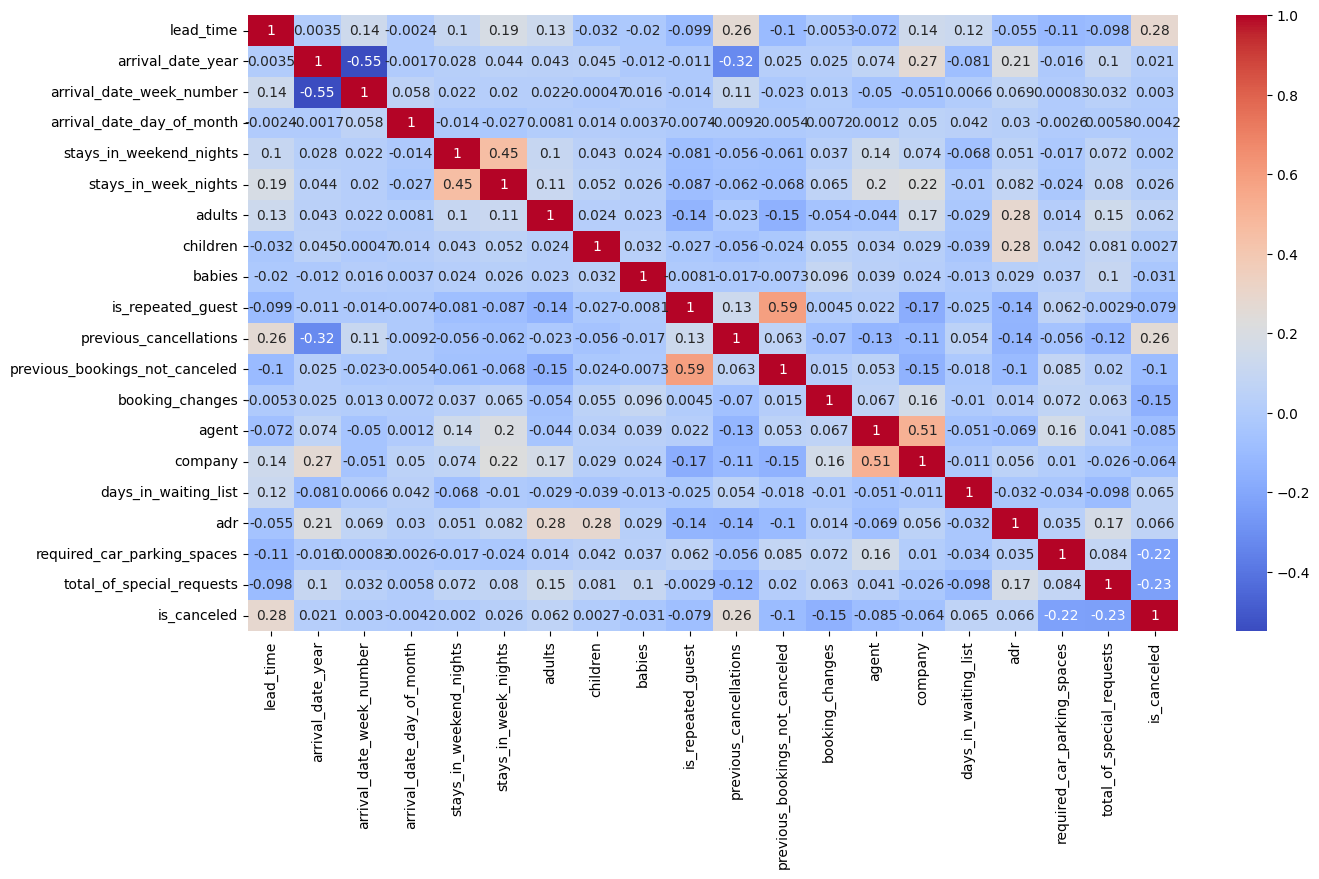

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Haciendo un mapa de calor de la correlacion de Pearson entre las variables, vemos que no hay una relacion lineal entre la mayoria de ellas. Relaciones a destacar: <br>
- **stay_in_week_nights y stay_in_weekeend_nights**: Tienen uno de los valores mas altos de correlacion, esto tiene sentido porque la cantidad de dias que te quedas en la semana tienen que estar a la par con la cantidad de dias de fin de semana. Esto no es una informacion valiosa ya que sucede en todas las reservas(ya que sino seria un valor atipico multivariado) y no nos dice nada especial sobre si se cancela o no <br>
- **previous_booking_not_canceled y is_repeated_guest**: Tienen la correlacion mas alta del dataset, tiene sentido porque una persona que ya ha hecho una reserva es probable que tenga otras, lo que habilita la posibilidad de que no haya cancelado mas reservas. Nos va a interesar estudiar estas dos variables mas adelante <br>
- **agent y company**: Su correlacion es "falsa" ya que al tratarse de ids, no nos brindan informacion en el contexto de nuestro problema <br>
- **is_canceled y lead_time**: Tienen una correlacion mediamente baja, pero nos interesa porque lead_time es la variable que tiene mas relacion con is_canceled, que es nuestra variable a predecir. Nos interesa estudiarla mas adelante
- **previous_cancellations y arrival_date_year**: Tienen una correlacion medianamente alta comparada con el resto pero aun no podemos saber si es una relacion que nos va a servir para predecir si la reserva va a ser cancelada o no (por lo menos no logicamente)


# Valores atipicos multivariados

Buscamos una relación entre los adultos y chicos o bebés presentes en las reservas

In [ ]:
reservas_limpio[(reservas_limpio["adults"] == 0) & ((reservas_limpio["children"] > 0) | (reservas_limpio["babies"] > 0))].shape

(121, 31)

Podemos ver que hay 121 filas en las cuales no hay adultos pero si hay chicos o bebes. Esto no podria ser posible así que eliminaremos estos valores

In [ ]:
reservas_limpio = reservas_limpio.drop(reservas_limpio[(reservas_limpio["adults"] == 0) & ((reservas_limpio["children"] > 0) | (reservas_limpio["babies"] > 0))].index.to_list())

# Visualización de variables

No se visualizan los pairplots de todas las variables juntas porque no se llegan a ver bien los gráficos

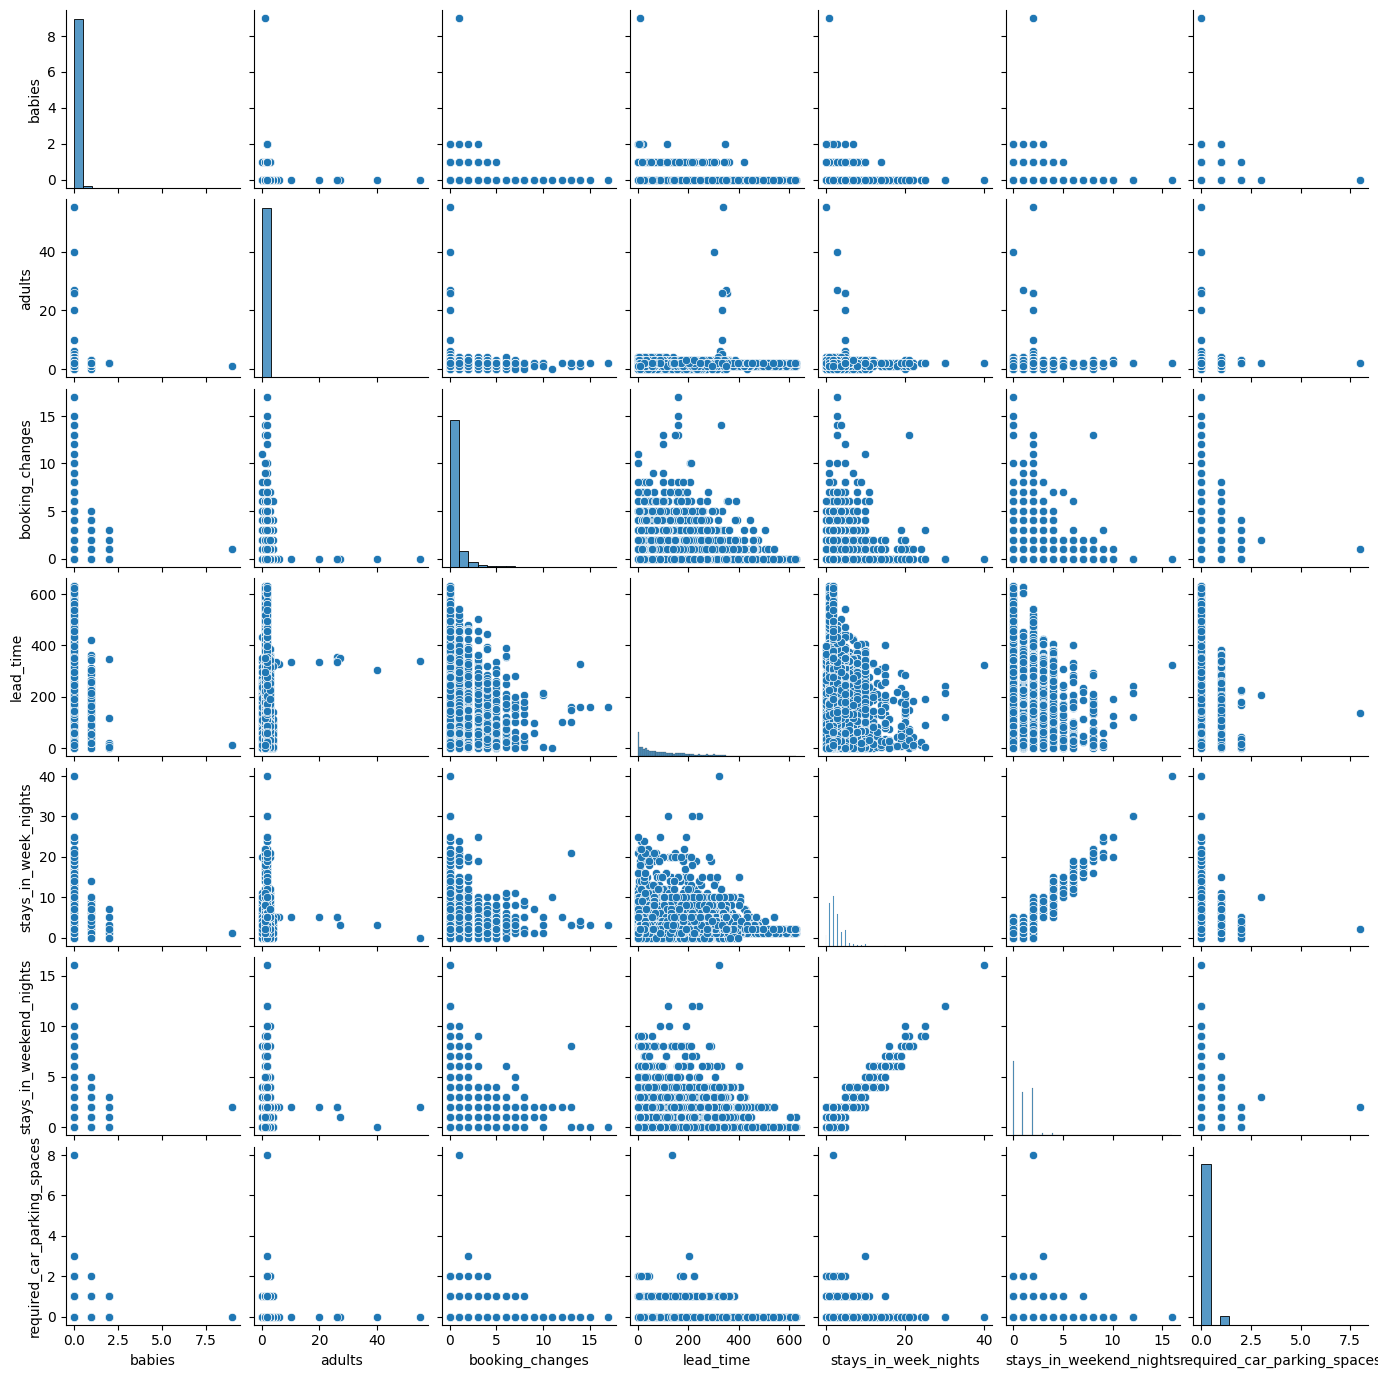

In [ ]:
sns.pairplot(reservas[['babies', 'adults', 'booking_changes', 'lead_time', 'stays_in_week_nights','stays_in_weekend_nights', 'required_car_parking_spaces']], height=2)

En este pairplot vemos que hay una relacion lineal entre **stays_in_week_nights y booking_changes**. Ya que entre mayor es el valor de noches en la semana de la reserva, menos cambios hay.
<br> Ademas vemos valores atipicos univariados claros en babies, adults, required_car_parking_spaces, booking_changes y stay_in_week_nights que ya fueron detectados y eliminados

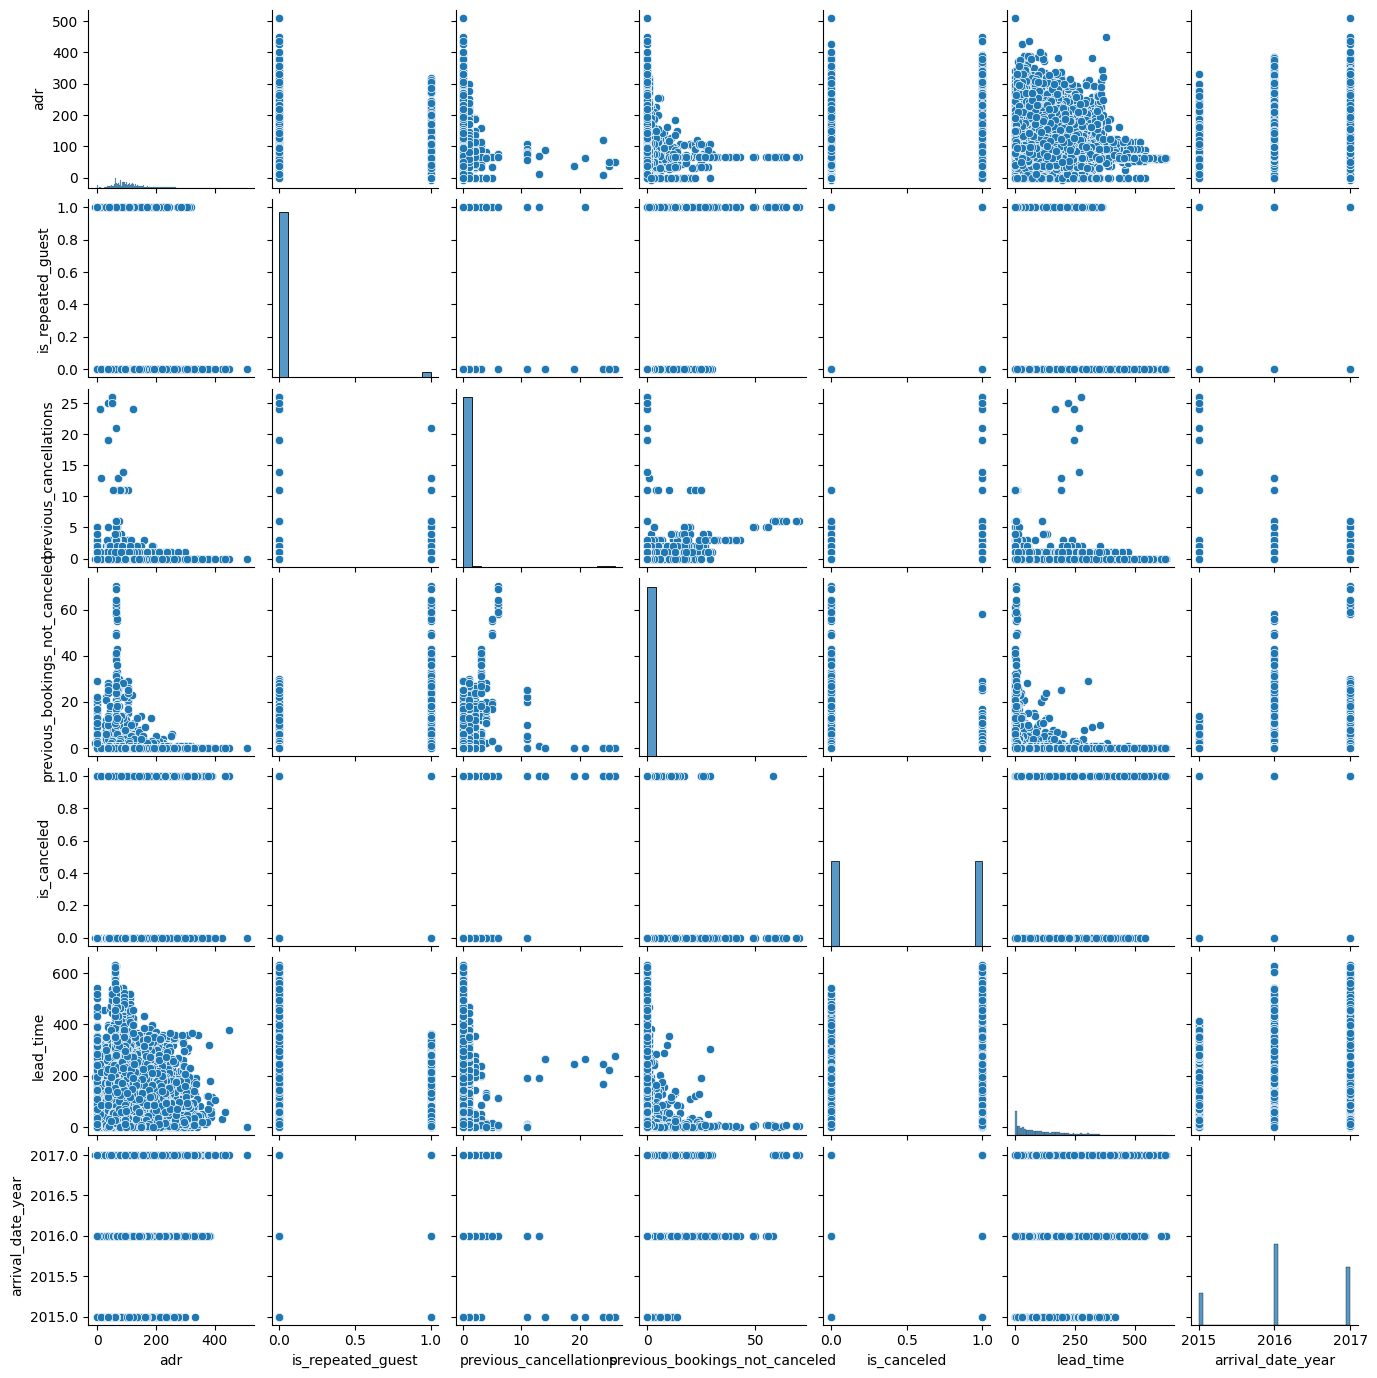

In [ ]:
sns.pairplot(reservas[['adr', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', "is_canceled", "lead_time", "arrival_date_year"]], height=2)

Vemos que hay una relacion lineal entre la variable **adr** y **previous_cancellations**, ya que entre mas disminuye la primera mas aumenta la segunda. Que se traduce como: entre mas barata es la noche de hotel mas cancelaciones previas tiene la reserva

# Datos Faltantes

In [ ]:
reservas.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos que country, agent y company tienen mayor cantidad de valores faltantes

Veamos que porcentaje de datos faltantes hay sobre el total en cada columna

In [ ]:
filas_totales=reservas.shape[0]
print(reservas.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

**GRAFICO DE PORCENTAJE DE DATOS FALTANTES**

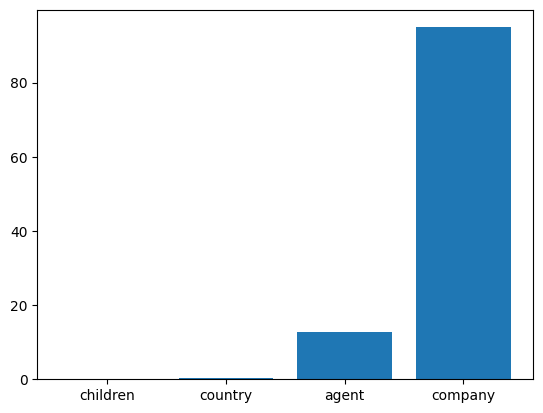

In [ ]:
filas_totales=reservas.shape[0]
porcentaje_faltantes_df = reservas.isna().sum()/filas_totales*100
porcentaje_faltantes_df = porcentaje_faltantes_df.drop(porcentaje_faltantes_df[porcentaje_faltantes_df == 0].index)
porcentaje_faltantes_df
plt.bar(porcentaje_faltantes_df.index, porcentaje_faltantes_df)
plt.show()

In [ ]:
print("Porcentaje de valores faltantes sobre el total:")
print("Porcentaje agent:  12,71%")
print("Porcentaje company:  94,88%")

Porcentaje de valores faltantes sobre el total:
Porcentaje agent:  12,71%
Porcentaje company:  94,88%


Podemos ver que la variable company en su mayoria esta sin valor, por la que podriamos tomar la decision de eliminarla.

En cambio en agent podriamos ver algun metodo para rellenar los datos faltantes.

In [ ]:
reservas_limpio = reservas_limpio.drop(columns = 'company')

Vamos a imputar todos los valores nulos de la columna agent agregando un id de valor -1 que va a indicar que la reserva fué por cuenta propia, y no por un agente en especifico con un numero de id

In [ ]:
def reemplazar_nulo(agent):
  negativo = -1
  if (math.isnan(agent)):
    return negativo
  else:
    return agent

reservas_limpio['agent'] = reservas_limpio['agent'].apply(reemplazar_nulo)
reservas_limpio.isna().sum()



hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           215
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

Vemos si existen filas duplicadas

In [ ]:
reservas[reservas.duplicated(keep=False)]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled


No existen filas duplicadas

Como la cantidad de reservas que tienen valores de country y children faltantes son pocas. Decidimos eliminarlas, ya que no creemos que sea un numero suficiente como para imputarlos

In [ ]:
reservas_country_nan = reservas_limpio[reservas_limpio['country'].isna()].index
reservas_children_nan = reservas_limpio[reservas_limpio['children'].isna()].index
reservas_limpio.drop(index=reservas_children_nan, axis=0, inplace=True)
reservas_limpio.drop(index=reservas_country_nan, axis=0, inplace=True)